# **Pemetaan Tema Ilmiah: Klasterisasi Abstrak DOAJ (Directory of Open Access Journals) Menggunakan K-Means**

### **Latar Belakang**
Dalam era keterbukaan informasi ilmiah, keberadaan jurnal open access menjadi sangat penting sebagai sumber pengetahuan yang dapat diakses oleh siapa saja. Salah satu repositori terbesar adalah DOAJ (Directory of Open Access Journals), yang memuat ribuan jurnal dari berbagai bidang ilmu. Namun, volume data yang sangat besar menyebabkan tantangan dalam memahami pola, tren, dan tema utama dari konten-konten ilmiah yang tersedia. Untuk menjawab tantangan ini, pendekatan Natural Language Processing (NLP) modern telah berkembang pesat, khususnya dengan hadirnya transformer-based models seperti BERT (Bidirectional Encoder Representations from Transformers) yang mampu memahami makna kontekstual dari teks. Dalam konteks pengelompokan dokumen, metode klasterisasi seperti DBSCAN (Density-Based Spatial Clustering of Applications with Noise) memberikan fleksibilitas karena tidak memerlukan jumlah klaster yang ditentukan di awal dan mampu mengidentifikasi outlier. Dengan menggabungkan kekuatan BERT dalam representasi semantik dan DBSCAN dalam klasterisasi berbasis densitas, penelitian ini bertujuan untuk memetakan tema-tema ilmiah dari abstrak jurnal di DOAJ secara otomatis, akurat, dan interpretatif.

### **Tujuan**
1. Mengambil dan memproses data abstrak jurnal dari DOAJ secara sistematis.
2. Mengubah teks abstrak menjadi representasi vektor semantik menggunakan model BERT.
3. Menerapkan algoritma DBSCAN untuk mengelompokkan abstrak berdasarkan kesamaan semantik.
4. Memvisualisasikan hasil klasterisasi untuk memetakan tema-tema ilmiah utama.
5. Menganalisis efektivitas kombinasi BERT dan DBSCAN dalam konteks pemetaan teks ilmiah.

### **Rumusan Masalah**
1. Bagaimana cara merepresentasikan abstrak jurnal DOAJ secara semantik menggunakan model NLP modern?
2. Apakah DBSCAN efektif dalam mengelompokkan abstrak berdasarkan hasil embedding dari BERT?
3. Tema ilmiah apa saja yang dapat diidentifikasi dari hasil klasterisasi teks menggunakan pendekatan ini?
4. Sejauh mana metode BERT + DBSCAN mampu memberikan wawasan yang bermakna terhadap koleksi teks ilmiah open access?

### **Dataset**

Dataset didapatkan dengan menggunakan teknik **Scrapping** dari website **DOAJ** (*Directory of Open Access Journals*) menggunakan *webdriver*.

- **Title**: Judul artikel jurnal.
- **Keywords**: Kata kunci utama artikel.
- **Abstract**: Ringkasan isi artikel.
- **Publisher**: Nama penerbit jurnal.
- **Publication Date**: Tanggal atau tahun terbit artikel.

## Import Package & Library

In [ ]:
!pip install Sastrawi
!pip install langid
!pip install deep-translator
!pip install langdetect

In [ ]:
# Import library yang sekiranya dibutuhkan
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

import langid
from deep_translator import GoogleTranslator

import os
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from datetime import datetime
import spacy

from langdetect import detect
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Metode cluster
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
# from sklearn.cluster import KMeans

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Load & Preprocessing

In [ ]:
df = pd.read_excel('/content/data irma.xlsx')
df

Title  \
0     Fishing, predation, and temperature drive herr...   
1     Management of Ureters Involved in Inguinal Her...   
2     Factors predicting active treatment free-survi...   
3     Мигранты и Российское государство в XX веке: в...   
4     Memória, História Oral e Patrimônio Imaterial ...   
...                                                 ...   
9904  Enrichment of Olive Fruits in Antioxidant Cont...   
9905  Unravelling the interplay of ecological proces...   
9906  Prevalence of Problematic Pornography Use and ...   
9907  Strategic Industrial Sourcing: the Japanese Ad...   
9908           Вольский Виктор Вацлавович (1921 - 1999)   

                                               Keywords  \
0     Atlantic herring,, climate change,, ecosystem,...   
1                                 No keywords available   
2                                 No keywords available   
3     миграция; миграционные режимы; миграционные пр...   
4     Memória,, História Oral,, Patrimônio Imaterial...   
...                                                 ...   
9904  olives,, phytoregulators,, polyphenols,, free ...   
9905                              No keywords available   
9906                              No keywords available   
9907                              No keywords available   
9908                              No keywords available   

                                               Abstract  \
0     Abstract Since 1960, landings of Atlantic herr...   
1     Background: The presence of a ureter in a hern...   
2                                 No abstract available   
3     Статья продолжает тему «самовольных мигрантов»...   
4     Neste artigo, demonstrei a relação entre a Mem...   
...                                                 ...   
9904  We here study the effect of the pre-harvest ap...   
9905                              No abstract available   
9906                              No abstract available   
9907                              No abstract available   
9908                              No abstract available   

                          Publisher Publication Date  
0             ECOLOGY AND EVOLUTION         DEC 2021  
1                       TRANSLATION         OCT 2018  
2     EUROPEAN UROLOGY OPEN SCIENCE         OCT 2020  
3                  QUAESTIO ROSSICA         APR 2018  
4                    REVISTA ODEERE         MAR 2017  
...                             ...              ...  
9904                          FOODS         OCT 2020  
9905         No publisher available         OCT 2020  
9906         No publisher available         OCT 2020  
9907                     PROMETHEUS         MAY 1995  
9908         No publisher available         MAY 1995  

[9909 rows x 5 columns]

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             9900 non-null   object
 1   Keywords          9884 non-null   object
 2   Abstract          9897 non-null   object
 3   Publisher         9909 non-null   object
 4   Publication Date  9909 non-null   object
dtypes: object(5)
memory usage: 387.2+ KB
None
            Title               Keywords               Abstract Publisher  \
count        9900                   9884                   9897      9909   
unique       9848                   6885                   8853      4731   
top     Editorial  No keywords available  No abstract available  PLOS ONE   
freq           13                   2978                    982       304   

       Publication Date  
count              9909  
unique              575  
top            JAN 2023  
freq                171  
Title    

In [ ]:
print("Tidak ada abstrak :", df[df['Abstract']=='No abstract available'].count())
print("Tidak ada publisher :", df[df['Publisher']=='No publisher available'].count())
print("Tidak ada kata kunci :", df[df['Keywords']=='No keywords available'].count())
print("Tidak ada tanggal publikasi :", df[df['Publication Date']=='No publication date available'].count())

Tidak ada abstrak : Title               973
Keywords            977
Abstract            982
Publisher           982
Publication Date    982
dtype: int64
Tidak ada publisher : Title               11
Keywords            11
Abstract            11
Publisher           11
Publication Date    11
dtype: int64
Tidak ada kata kunci : Title               2970
Keywords            2978
Abstract            2971
Publisher           2978
Publication Date    2978
dtype: int64
Tidak ada tanggal publikasi : Title               0
Keywords            0
Abstract            0
Publisher           0
Publication Date    0
dtype: int64


In [ ]:
df[df['Abstract']=='No abstract available']

Title  \
2     Factors predicting active treatment free-survi...   
14    Crystal structure of tris(tri-tert-butoxysilan...   
38    „Sok irásokbúl, s’hasznos experientiákból ki t...   
60    European Current Research on Fluid Inclusions ...   
63    Preparation of 2,4-dimethyldecane, 5-n-propyln...   
...                                                 ...   
9900                                              Wstęp   
9905  Unravelling the interplay of ecological proces...   
9906  Prevalence of Problematic Pornography Use and ...   
9907  Strategic Industrial Sourcing: the Japanese Ad...   
9908           Вольский Виктор Вацлавович (1921 - 1999)   

                   Keywords               Abstract  \
2     No keywords available  No abstract available   
14    No keywords available  No abstract available   
38                 recenzió  No abstract available   
60    No keywords available  No abstract available   
63    No keywords available  No abstract available   
...                     ...                    ...   
9900  No keywords available  No abstract available   
9905  No keywords available  No abstract available   
9906  No keywords available  No abstract available   
9907  No keywords available  No abstract available   
9908  No keywords available  No abstract available   

                                              Publisher Publication Date  
2                         EUROPEAN UROLOGY OPEN SCIENCE         OCT 2020  
14    ZEITSCHRIFT FÜR KRISTALLOGRAPHIE - NEW CRYSTAL...         DEC 1997  
38                                           COMPETITIO         JUN 2011  
60                                     OPEN GEOSCIENCES         JUN 2012  
63                                              ARKIVOC         APR 2004  
...                                                 ...              ...  
9900                                RÌČNIK RUSKOJ BURSY         FEB 2019  
9905                             No publisher available         OCT 2020  
9906                             No publisher available         OCT 2020  
9907                                         PROMETHEUS         MAY 1995  
9908                             No publisher available         MAY 1995  

[982 rows x 5 columns]

In [ ]:
df[df['Publisher']=='No publisher available']

Title  \
3241  Oportunidades, riesgos y resultados reales de ...   
3512  PRICHAIN: A Partially Decentralized Implementa...   
5753  Photobiomodulation use in ophthalmology – an o...   
7189  Synthetic Approaches Toward Phosphorus-Contain...   
8981  Sticking With It: ER-PM Membrane Contact Sites...   
8982  The role of pharmacists in enhancing epilepsy ...   
8993  A Novel Technique for Treating Cartilage Defec...   
8994  The Role of Polycomb Proteins in Cell Lineage ...   
9905  Unravelling the interplay of ecological proces...   
9906  Prevalence of Problematic Pornography Use and ...   
9908           Вольский Виктор Вацлавович (1921 - 1999)   

                                               Keywords  \
3241  Reforma local,, medidas de ajuste,, competenci...   
3512                    privacy,, blockchain,, ethereum   
5753  photobiomodulation,, ophthalmology,, retina,, ...   
7189  boron-dipyrromethene,, fluorescence,, imaging,...   
8981  endoplasmic reticulum,, plasma membrane,, ER-P...   
8982  Patient safety,, pharmacoepidemiology,, system...   
8993                              No keywords available   
8994  Polycomb,, H3K27me3,, H2AK119ub,, pluripotency...   
9905                              No keywords available   
9906                              No keywords available   
9908                              No keywords available   

                   Abstract               Publisher Publication Date  
3241  No abstract available  No publisher available         JAN 2018  
3512  No abstract available  No publisher available         JUN 2021  
5753  No abstract available  No publisher available         MAR 2021  
7189  No abstract available  No publisher available         JAN 1996  
8981  No abstract available  No publisher available         MAR 2021  
8982  No abstract available  No publisher available         MAR 2021  
8993  No abstract available  No publisher available         MAR 2024  
8994  No abstract available  No publisher available         MAR 2024  
9905  No abstract available  No publisher available         OCT 2020  
9906  No abstract available  No publisher available         OCT 2020  
9908  No abstract available  No publisher available         MAY 1995

In [ ]:
publishers = df['Publisher'].unique().tolist()
for publisher in publishers:
    print(publisher)

ECOLOGY AND EVOLUTION
TRANSLATION
EUROPEAN UROLOGY OPEN SCIENCE
QUAESTIO ROSSICA
REVISTA ODEERE
IEEE ACCESS
COLUMBIA SOCIAL WORK REVIEW
HERAUSFORDERUNG LEHRER*INNENBILDUNG
AGGREGATE
GAZETA MÉDICA
ANKARA ÜNIVERSITESI EĞITIM BILIMLERI FAKÜLTESI DERGISI
GLOSSA
CELL JOURNAL
ENGINEERING REPORTS
ZEITSCHRIFT FÜR KRISTALLOGRAPHIE - NEW CRYSTAL STRUCTURES
ЭНДОДОНТИЯ TODAY
TRABALHO & EDUCAÇÃO
CIVITAS - REVISTA DE CIÊNCIAS SOCIAIS
ACADEMIA XXII
CHEMISTRY JOURNAL OF MOLDOVA: GENERAL, INDUSTRIAL AND ECOLOGICAL CHEMISTRY
BMC PREGNANCY AND CHILDBIRTH
PESQUISA AGROPECUÁRIA BRASILEIRA
STUDIES IN COMMUNICATION SCIENCES
SCIENTIFIC REPORTS
REVISTA BOLETÍN REDIPE
ИЗВЕСТИЯ САРАТОВСКОГО УНИВЕРСИТЕТА: НОВАЯ СЕРИЯ. СЕРИЯ ФИЛОСОФИЯ. ПСИХОЛОГИЯ. ПЕДАГОГИКА
INDIAN JOURNAL OF NEUROSURGERY
FRONTIERS IN PSYCHOLOGY
BMC MUSCULOSKELETAL DISORDERS
FRONTIERS IN PHYSIOLOGY
RESULTS IN CHEMISTRY
PHILOSOPHIES
ECONOMIES
BORSA ISTANBUL REVIEW
INTERNATIONAL JOURNAL FOR EQUITY IN HEALTH
DISEASE MODELS & MECHANISMS
FRONTIERS IN I

In [ ]:
# Menghitung jumlah masing-masing publisher
publisher_counts = df['Publisher'].value_counts()
publisher_counts

Publisher
PLOS ONE                            304
SCIENTIFIC REPORTS                  122
IEEE ACCESS                          82
SENSORS                              68
APPLIED SCIENCES                     66
                                   ... 
MADERAS: CIENCIA Y TECNOLOGÍA         1
ACTA HERPETOLOGICA                    1
BMC MEDICINE                          1
مجلة ابحاث كلية التربية الاساسية      1
LITERATŪRA                            1
Name: count, Length: 4731, dtype: int64

In [ ]:
# 1. Hapus baris dengan missing value (NaN) di kolom manapun
df_clean = df.dropna()

# 2. Hapus baris yang mengandung placeholder di Abstract, Publisher, dan Keywords
df_clean = df_clean[
    (df_clean['Abstract'].str.strip() != 'No abstract available') &
    (df_clean['Publisher'].str.strip() != 'No publisher available') &
    (df_clean['Keywords'].str.strip() != 'No keywords available')
]

# 3. Tampilkan jumlah data setelah dibersihkan
print(f"Jumlah data setelah dibersihkan: {len(df_clean)}")

Jumlah data setelah dibersihkan: 6725


In [ ]:
print(df_clean.info())
print(df_clean.isnull().sum())

print("Tidak ada abstrak :", df_clean[df_clean['Abstract']=='No abstract available'].count())
print("Tidak ada publisher :", df_clean[df_clean['Publisher']=='No publisher available'].count())
print("Tidak ada kata kunci :", df_clean[df_clean['Keywords']=='No keywords available'].count())
print("Tidak ada tanggal publikasi :", df_clean[df_clean['Publication Date']=='No publication date available'].count())

<class 'pandas.core.frame.DataFrame'>
Index: 6725 entries, 0 to 9904
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             6725 non-null   object
 1   Keywords          6725 non-null   object
 2   Abstract          6725 non-null   object
 3   Publisher         6725 non-null   object
 4   Publication Date  6725 non-null   object
dtypes: object(5)
memory usage: 315.2+ KB
None
Title               0
Keywords            0
Abstract            0
Publisher           0
Publication Date    0
dtype: int64
Tidak ada abstrak : Title               0
Keywords            0
Abstract            0
Publisher           0
Publication Date    0
dtype: int64
Tidak ada publisher : Title               0
Keywords            0
Abstract            0
Publisher           0
Publication Date    0
dtype: int64
Tidak ada kata kunci : Title               0
Keywords            0
Abstract            0
Publisher           0
Publicat

### Mendeteksi bahasa dan merubahnya menjadi bahasa indonesia semua, agar lebih efektif untuk dianalisis

In [ ]:
df_clean['bahasa_judul'] = df_clean['Title'].apply(lambda x: langid.classify(x)[0])
df_clean['bahasa_katkun'] = df_clean['Keywords'].apply(lambda x: langid.classify(x)[0])
df_clean['bahasa_abstrak'] = df_clean['Abstract'].apply(lambda x: langid.classify(x)[0])

In [ ]:
df_clean.head()

Title  \
0  Fishing, predation, and temperature drive herr...   
3  Мигранты и Российское государство в XX веке: в...   
4  Memória, História Oral e Patrimônio Imaterial ...   
5  Development and Hybrid Control of an Electrica...   
7            Zertifikat Inklusion – Basiskompetenzen   

                                            Keywords  \
0  Atlantic herring,, climate change,, ecosystem,...   
3  миграция; миграционные режимы; миграционные пр...   
4  Memória,, História Oral,, Patrimônio Imaterial...   
5  Lower limb exoskeleton,, system design,, human...   
7  Inklusion,, Lehrer_innenbildung,, reflektierte...   

                                            Abstract  \
0  Abstract Since 1960, landings of Atlantic herr...   
3  Статья продолжает тему «самовольных мигрантов»...   
4  Neste artigo, demonstrei a relação entre a Mem...   
5  This paper describes a system design and hybri...   
7  Der Artikel gibt einen konzeptionellen und inh...   

                             Publisher Publication Date bahasa_judul  \
0                ECOLOGY AND EVOLUTION         DEC 2021           en   
3                     QUAESTIO ROSSICA         APR 2018           ru   
4                       REVISTA ODEERE         MAR 2017           pt   
5                          IEEE ACCESS         JAN 2019           en   
7  HERAUSFORDERUNG LEHRER*INNENBILDUNG         NOV 2019           de   

  bahasa_katkun bahasa_abstrak  
0            en             en  
3            ru             ru  
4            pt             pt  
5            en             en  
7            de             de

In [ ]:
# Fungsi translate hanya jika bukan bahasa Indonesia
def translate_to_indonesian(text, lang):
    try:
        if lang != 'id':
            return GoogleTranslator(source=lang, target='id').translate(text)
        else:
            return text
    except:
        return text  # Kalau gagal translate, biarkan teks aslinya

# Misal df sudah ada kolom tweet dan language
df_clean['Title'] = df_clean.apply(lambda row: translate_to_indonesian(row['Title'], row['bahasa_judul']), axis=1)
df_clean['Keywrods'] = df_clean.apply(lambda row: translate_to_indonesian(row['Keywords'], row['bahasa_katkun']), axis=1)
df_clean['Abstract'] = df_clean.apply(lambda row: translate_to_indonesian(row['Abstract'], row['bahasa_abstrak']), axis=1)

In [ ]:
df_clean.head()

Title  \
0  Memancing, predasi, dan suhu drive herring men...   
3  Migran dan Negara Rusia di Abad ke -20: Peluan...   
4  Memori, Sejarah Lisan, dan Warisan Immaterial ...   
5  Pengembangan dan kontrol hibrida dari eksoskel...   
7              Inklusi Sertifikat - Kompetensi Dasar   

                                            Keywords  \
0  Atlantic herring,, climate change,, ecosystem,...   
3  миграция; миграционные режимы; миграционные пр...   
4  Memória,, História Oral,, Patrimônio Imaterial...   
5  Lower limb exoskeleton,, system design,, human...   
7  Inklusion,, Lehrer_innenbildung,, reflektierte...   

                                            Abstract  \
0  Abstrak Sejak 1960, pendaratan Herring Atlanti...   
3  Artikel ini melanjutkan tema "migran yang tida...   
4  Dalam artikel ini, saya menunjukkan hubungan a...   
5  Makalah ini menjelaskan desain sistem dan algo...   
7  Artikel ini memberikan tinjauan konseptual dan...   

                             Publisher Publication Date bahasa_judul  \
0                ECOLOGY AND EVOLUTION         DEC 2021           en   
3                     QUAESTIO ROSSICA         APR 2018           ru   
4                       REVISTA ODEERE         MAR 2017           pt   
5                          IEEE ACCESS         JAN 2019           en   
7  HERAUSFORDERUNG LEHRER*INNENBILDUNG         NOV 2019           de   

  bahasa_katkun bahasa_abstrak  \
0            en             en   
3            ru             ru   
4            pt             pt   
5            en             en   
7            de             de   

                                            Keywrods  
0  Herring Atlantik, Perubahan Iklim ,, Ekosistem...  
3  migrasi; rezim migrasi; praktik migrasi; peker...  
4  Ingatan ,, sejarah lisan ,, warisan tidak berw...  
5  Exoskeleton ekstremitas bawah ,, Desain Sistem...  
7  Inklusi ,, pembentukan guru, praktik yang terc...

In [ ]:
# Simpan dengan nama acak
filename = "full translate jurnal.csv"
df_clean.to_csv(filename, index=False)

# **==================================================================================================**

In [ ]:
df = pd.read_csv('/content/full translate jurnal.csv')
df

Title  \
0     Memancing, predasi, dan suhu drive herring men...   
1     Migran dan Negara Rusia di Abad ke -20: Peluan...   
2     Memori, Sejarah Lisan, dan Warisan Immaterial ...   
3     Pengembangan dan kontrol hibrida dari eksoskel...   
4                 Inklusi Sertifikat - Kompetensi Dasar   
...                                                 ...   
6720  Periksa ulang alasan poligami dari tampilan tr...   
6721  Program Pemulihan yang Ditingkatkan dalam Beda...   
6722  Expeemimnttal itetitit dari expave nrrut effc ...   
6723  Skor Beaf2: Skor stratifikasi risiko baru untu...   
6724  Pengayaan buah zaitun dalam kandungan antioksi...   

                                               Keywords  \
0     Atlantic herring,, climate change,, ecosystem,...   
1     миграция; миграционные режимы; миграционные пр...   
2     Memória,, História Oral,, Patrimônio Imaterial...   
3     Lower limb exoskeleton,, system design,, human...   
4     Inklusion,, Lehrer_innenbildung,, reflektierte...   
...                                                 ...   
6720  gender view,, polygamy,, gender interests,, ma...   
6721  Enhanced recovery after surgery,, Lung cancer ...   
6722  n‌a‌i‌l‌i‌n‌g,, p‌u‌l‌l‌o‌u‌t b‌o‌x,, e‌x‌p‌a‌...   
6723  echocardiography,, preclinical heart failure,,...   
6724  olives,, phytoregulators,, polyphenols,, free ...   

                                               Abstract  \
0     Abstrak Sejak 1960, pendaratan Herring Atlanti...   
1     Artikel ini melanjutkan tema "migran yang tida...   
2     Dalam artikel ini, saya menunjukkan hubungan a...   
3     Makalah ini menjelaskan desain sistem dan algo...   
4     Artikel ini memberikan tinjauan konseptual dan...   
...                                                 ...   
6720  Saat ini, karena urutan korup dari pandangan d...   
6721  Shuangjiang Li,1 Kun Zhou,1 Guowei Che,1 Mei Y...   
6722  Dalam permintaan Deban Life dan Increach yang ...   
6723  Latar Belakang Tahap B gagal jantung (HF) meng...   
6724  Kami di sini mempelajari pengaruh aplikasi asa...   

                                              Publisher Publication Date  \
0                                 ECOLOGY AND EVOLUTION         DEC 2021   
1                                      QUAESTIO ROSSICA         APR 2018   
2                                        REVISTA ODEERE         MAR 2017   
3                                           IEEE ACCESS         JAN 2019   
4                   HERAUSFORDERUNG LEHRER*INNENBILDUNG         NOV 2019   
...                                                 ...              ...   
6720                                 فقه و حقوق خانواده         APR 2023   
6721                     CANCER MANAGEMENT AND RESEARCH         NOV 2017   
6722                                  مهندسی عمران شریف         AUG 2020   
6723  JOURNAL OF THE AMERICAN HEART ASSOCIATION: CAR...         OCT 2024   
6724                                              FOODS         OCT 2020   

     bahasa_judul bahasa_katkun bahasa_abstrak  \
0              en            en             en   
1              ru            ru             ru   
2              pt            pt             pt   
3              en            en             en   
4              de            de             de   
...           ...           ...            ...   
6720           en            da             en   
6721           en            en             en   
6722           fa            fa             am   
6723           en            en             en   
6724           en            en             en   

                                               Keywrods  
0     Herring Atlantik, Perubahan Iklim ,, Ekosistem...  
1     migrasi; rezim migrasi; praktik migrasi; peker...  
2     Ingatan ,, sejarah lisan ,, warisan tidak berw...  
3     Exoskeleton ekstremitas bawah ,, Desain Sistem...  
4     Inklusi ,, pembentukan guru, praktik yang terc...  
...                                                 ...  
672

In [ ]:
df2 = df[['Title', 'Keywrods', 'Abstract', 'Publisher', 'Publication Date']]
df2 = df2.rename(columns={
    'Title': 'judul',
    'Keywrods': 'kata kunci',
    'Abstract': 'abstrak',
    'Publisher': 'penerbit',
    'Publication Date': 'tanggal publikasi'
})
df2

judul  \
0     Memancing, predasi, dan suhu drive herring men...   
1     Migran dan Negara Rusia di Abad ke -20: Peluan...   
2     Memori, Sejarah Lisan, dan Warisan Immaterial ...   
3     Pengembangan dan kontrol hibrida dari eksoskel...   
4                 Inklusi Sertifikat - Kompetensi Dasar   
...                                                 ...   
6720  Periksa ulang alasan poligami dari tampilan tr...   
6721  Program Pemulihan yang Ditingkatkan dalam Beda...   
6722  Expeemimnttal itetitit dari expave nrrut effc ...   
6723  Skor Beaf2: Skor stratifikasi risiko baru untu...   
6724  Pengayaan buah zaitun dalam kandungan antioksi...   

                                             kata kunci  \
0     Herring Atlantik, Perubahan Iklim ,, Ekosistem...   
1     migrasi; rezim migrasi; praktik migrasi; peker...   
2     Ingatan ,, sejarah lisan ,, warisan tidak berw...   
3     Exoskeleton ekstremitas bawah ,, Desain Sistem...   
4     Inklusi ,, pembentukan guru, praktik yang terc...   
...                                                 ...   
6720  Pandangan Jender ,, Poligami ,, Minat Jender ,...   
6721  Peningkatan pemulihan setelah operasi, Operasi...   
6722  nudiili -ng ,, pudulolut box ,, expas nrout ,,...   
6723  ekokardiografi ,, gagal jantung praklinis ,, s...   
6724  zaitun ,, phytoregulator ,, polifenol ,, aktiv...   

                                                abstrak  \
0     Abstrak Sejak 1960, pendaratan Herring Atlanti...   
1     Artikel ini melanjutkan tema "migran yang tida...   
2     Dalam artikel ini, saya menunjukkan hubungan a...   
3     Makalah ini menjelaskan desain sistem dan algo...   
4     Artikel ini memberikan tinjauan konseptual dan...   
...                                                 ...   
6720  Saat ini, karena urutan korup dari pandangan d...   
6721  Shuangjiang Li,1 Kun Zhou,1 Guowei Che,1 Mei Y...   
6722  Dalam permintaan Deban Life dan Increach yang ...   
6723  Latar Belakang Tahap B gagal jantung (HF) meng...   
6724  Kami di sini mempelajari pengaruh aplikasi asa...   

                                               penerbit tanggal publikasi  
0                                 ECOLOGY AND EVOLUTION          DEC 2021  
1                                      QUAESTIO ROSSICA          APR 2018  
2                                        REVISTA ODEERE          MAR 2017  
3                                           IEEE ACCESS          JAN 2019  
4                   HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019  
...                                                 ...               ...  
6720                                 فقه و حقوق خانواده          APR 2023  
6721                     CANCER MANAGEMENT AND RESEARCH          NOV 2017  
6722                                  مهندسی عمران شریف          AUG 2020  
6723  JOURNAL OF THE AMERICAN HEART ASSOCIATION: CAR...          OCT 2024  
6724                                              FOODS          OCT 2020  

[6725 rows x 5 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725 entries, 0 to 6724
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   judul              6725 non-null   object
 1   kata kunci         6717 non-null   object
 2   abstrak            6717 non-null   object
 3   penerbit           6725 non-null   object
 4   tanggal publikasi  6725 non-null   object
dtypes: object(5)
memory usage: 262.8+ KB


## Membersihkan dokumen dengan fungsi CleaningText, setelah itu merubah semua menjadi huruf kecil

In [ ]:
# Membuat fungsi untuk proses preprocessing pada tweet
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def clean_emoticons(text):
    # Definisikan pola emoticon dengan regular expression
    emoticon_pattern = re.compile(
        r'[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\U00002702-\U000027B0]|[\U000024C2-\U0001F251]',
        flags=re.UNICODE
    )

    # Ganti emoticon dengan string kosong
    cleaned_text = emoticon_pattern.sub('', text)

    return cleaned_text

In [ ]:
# Mengisi NaN dengan string kosong untuk menghindari error
df2['judul'] = df2['judul'].fillna("")
df2['kata kunci'] = df2['kata kunci'].fillna("")
df2['abstrak'] = df2['abstrak'].fillna("")

# Pastikan semua nilai di kolom adalah string
df2['judul'] = df2['judul'].astype(str)
df2['kata kunci'] = df2['kata kunci'].astype(str)
df2['abstrak'] = df2['abstrak'].astype(str)

# Terapkan fungsi cleaningText dan casefoldingText
df2['judul'] = df2['judul'].apply(cleaningText).apply(casefoldingText)
df2['kata kunci'] = df2['kata kunci'].apply(cleaningText).apply(casefoldingText)
df2['abstrak'] = df2['abstrak'].apply(cleaningText).apply(casefoldingText)

df2.head()

judul  \
0  memancing predasi dan suhu drive herring menur...   
1  migran dan negara rusia di abad ke  peluang da...   
2  memori sejarah lisan dan warisan immaterial af...   
3  pengembangan dan kontrol hibrida dari eksoskel...   
4               inklusi sertifikat  kompetensi dasar   

                                          kata kunci  \
0  herring atlantik perubahan iklim  ekosistem be...   
1  migrasi rezim migrasi praktik migrasi pekerjaa...   
2  ingatan  sejarah lisan  warisan tidak berwujud...   
3  exoskeleton ekstremitas bawah  desain sistem  ...   
4  inklusi  pembentukan guru praktik yang tercerm...   

                                             abstrak  \
0  abstrak sejak  pendaratan herring atlantik tel...   
1  artikel ini melanjutkan tema migran yang tidak...   
2  dalam artikel ini saya menunjukkan hubungan an...   
3  makalah ini menjelaskan desain sistem dan algo...   
4  artikel ini memberikan tinjauan konseptual dan...   

                              penerbit tanggal publikasi  
0                ECOLOGY AND EVOLUTION          DEC 2021  
1                     QUAESTIO ROSSICA          APR 2018  
2                       REVISTA ODEERE          MAR 2017  
3                          IEEE ACCESS          JAN 2019  
4  HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019

## Tokenizing

In [ ]:
# Fungsi tokenize alternatif tanpa nltk
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())  # Memisahkan kata berdasarkan spasi & karakter non-alfabet

In [ ]:
# Dilakukan tokenize
df2['judul'] = df2['judul'].apply(simple_tokenize)
df2['kata kunci'] = df2['kata kunci'].apply(simple_tokenize)
df2['abstrak'] = df2['abstrak'].apply(simple_tokenize)

df2.head()

judul  \
0  [memancing, predasi, dan, suhu, drive, herring...   
1  [migran, dan, negara, rusia, di, abad, ke, pel...   
2  [memori, sejarah, lisan, dan, warisan, immater...   
3  [pengembangan, dan, kontrol, hibrida, dari, ek...   
4           [inklusi, sertifikat, kompetensi, dasar]   

                                          kata kunci  \
0  [herring, atlantik, perubahan, iklim, ekosiste...   
1  [migrasi, rezim, migrasi, praktik, migrasi, pe...   
2  [ingatan, sejarah, lisan, warisan, tidak, berw...   
3  [exoskeleton, ekstremitas, bawah, desain, sist...   
4  [inklusi, pembentukan, guru, praktik, yang, te...   

                                             abstrak  \
0  [abstrak, sejak, pendaratan, herring, atlantik...   
1  [artikel, ini, melanjutkan, tema, migran, yang...   
2  [dalam, artikel, ini, saya, menunjukkan, hubun...   
3  [makalah, ini, menjelaskan, desain, sistem, da...   
4  [artikel, ini, memberikan, tinjauan, konseptua...   

                              penerbit tanggal publikasi  
0                ECOLOGY AND EVOLUTION          DEC 2021  
1                     QUAESTIO ROSSICA          APR 2018  
2                       REVISTA ODEERE          MAR 2017  
3                          IEEE ACCESS          JAN 2019  
4  HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019

## Stopwords Removal

In [ ]:
# Definisi daftar stopwords untuk bahasa Indonesia
stopwords_indonesia = set(stopwords.words('indonesian'))

# Fungsi untuk membersihkan teks dari stopwords
def remove_stopwords(tokenized_text, stop_words):
    filtered_words = [word for word in tokenized_text if word.lower() not in stop_words]
    return filtered_words  # Kembalikan dalam bentuk list

In [ ]:
df2['judul'] = df2['judul'].apply(lambda x: remove_stopwords(x, stopwords_indonesia))
df2['kata kunci'] = df2['kata kunci'].apply(lambda x: remove_stopwords(x, stopwords_indonesia))
df2['abstrak'] = df2['abstrak'].apply(lambda x: remove_stopwords(x, stopwords_indonesia))

df2.head()

judul  \
0  [memancing, predasi, suhu, drive, herring, men...   
1  [migran, negara, rusia, abad, peluang, pembata...   
2  [memori, sejarah, lisan, warisan, immaterial, ...   
3  [pengembangan, kontrol, hibrida, eksoskeleton,...   
4           [inklusi, sertifikat, kompetensi, dasar]   

                                          kata kunci  \
0  [herring, atlantik, perubahan, iklim, ekosiste...   
1  [migrasi, rezim, migrasi, praktik, migrasi, pe...   
2  [ingatan, sejarah, lisan, warisan, berwujud, t...   
3  [exoskeleton, ekstremitas, desain, sistem, nia...   
4  [inklusi, pembentukan, guru, praktik, tercermi...   

                                             abstrak  \
0  [abstrak, pendaratan, herring, atlantik, terbe...   
1  [artikel, melanjutkan, tema, migran, sah, dian...   
2  [artikel, hubungan, ingatan, sejarah, lisan, w...   
3  [makalah, desain, sistem, algoritma, kontrol, ...   
4  [artikel, tinjauan, konseptual, terkait, konte...   

                              penerbit tanggal publikasi  
0                ECOLOGY AND EVOLUTION          DEC 2021  
1                     QUAESTIO ROSSICA          APR 2018  
2                       REVISTA ODEERE          MAR 2017  
3                          IEEE ACCESS          JAN 2019  
4  HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019

In [ ]:
# Melakukan pembersihan kata kembali dengan stopsords manual
stopword=['gue','gw','user','gak','gk','yang','yg','lu','ya','si','jd','jadi','apa','ap','ama','iya','lbh',
         'jd','kalo','klo','tdk','tidak','nya','ny','tuh','sih','sdh','udah','udh','langsung','mah','bang',
         'url','loe','lo','deh','dh','tp','tapi','emg','emang','ah','aja','aj','ke','dah','eh','gimana',
         'jg','juga','jgn','g','ga','nih','ni','tu', 'banget','bgt','gk','harus','hrs','biar','gini','ttp',
         'dr','dari','dri','ente','tentang','ttg','sudah','di', 'amp','semua','kalau','tau','lg','karna',
         'mau','masih','msh','cuma','cm','sj','saja','dengan','dgn','dlu','dulu','dl','sok','karena','luh',
         'kan','it','itu','buat','tak','oleh','km','kamu','kmu','kali','kayak','bikin','bkn','loh','bener',
         'trus','terus','gua','dasar','kau','orang','liat','lihat','masuk','org','ulang','wkwkwk','gmnin',
         'dapat','dpt','pd','pada','x','isi','itu','it','kek','spt','suka','mending','jan','hauahahaha','o',
         'wes','sisan','gih','woy','woii','aje','rp','klw','mudah','ngapain','kek','skrg','sby','lbh','mrk',
         'ngak','bang','habishabisan','hp','sgala','segala','pake','pke','ttp','hti','elo','ta','wk','cari',
         'udik','haha','sampe','kl','ma','dsna','stlh','setelah','ajk','ajak', 'wkwkwk', 'kek', 'kok', 'eee',
          'awkwkwkw', 'nya', 'serta', 'ini', 'ni', 'jdi', 'ku', 'gtu', 'ada', 'aku', 'dia', 'atau', 'dan',
          'biar', 'tuh', 'jd', 'jadi', 'usul', 'laku', 'th', 'tuh', 'gtu', 'gitu', 'oh', 'qc', 'tp', "banyak",
          "seolah2", "mulai", "jangan", "kasihan", "kalau", "sih", "lagi", "oh", "kasian", "maaf", "hayo",
          "aneh", "deh", "masa", "ini", "anda", "kami", "makna", "terimakasih", "trima", "atas", "mengenang",
          "sudah", "boleh", "ngakak", "aku", "kemarin", "karna", "yang", "itu", "tidak", "baik", "ya", "om",
          "kemana", "kok", "dia", "kalau", "jd", "lah", "jadi", "gara2", "tapi", "skr", "pasti", "malah",
          "tapi",'qc', 'tp', 'lawa', 'hah', 'arah', 'bah', 'may', 'dik', 'ibu', 'cat', 'tol', 'dar', 'bur',
          'bis', 'ira', 'tuk', 'tri', 'mana', 'iri', 'agam', 'bs', 'bal', 'gus', 'aja', 'at', 'min', 'isi',
          'ika', 'kan', 'ngga', 'yes', 'sia', 'era', 'jarot', 'u', 'ber', 'ama', 'nang', 'ko', 'rt', 'or',
          'aka', 'ih', 'a', 'is', 'pa', 'da', 'ak', 'il', 'c', 'y', 'b', 'm', 'h', 'r', 'n', 'wkwkwkwk',
          'sih']

def clean_key(text):
    if isinstance(text, list):  # Jika datanya berbentuk list, kita langsung filter
        text = [word for word in text if word not in stopword]
        return ' '.join(text)  # Ubah kembali ke string
    elif isinstance(text, str):  # Jika masih string, lakukan filtering seperti biasa
        return ' '.join(word for word in text.split() if word not in stopword)
    else:
        return ''  # Jika bukan string atau list, kembalikan string kosong

In [ ]:
# Membersihkan teks dari stopwords manual
df2['judul'] = df2['judul'].apply(clean_key).apply(simple_tokenize)
df2['kata kunci'] = df2['kata kunci'].apply(clean_key).apply(simple_tokenize)
df2['abstrak'] = df2['abstrak'].apply(clean_key).apply(simple_tokenize)

df2.head()

judul  \
0  [memancing, predasi, suhu, drive, herring, men...   
1  [migran, negara, rusia, abad, peluang, pembata...   
2  [memori, sejarah, lisan, warisan, immaterial, ...   
3  [pengembangan, kontrol, hibrida, eksoskeleton,...   
4                  [inklusi, sertifikat, kompetensi]   

                                          kata kunci  \
0  [herring, atlantik, perubahan, iklim, ekosiste...   
1  [migrasi, rezim, migrasi, praktik, migrasi, pe...   
2  [ingatan, sejarah, lisan, warisan, berwujud, t...   
3  [exoskeleton, ekstremitas, desain, sistem, nia...   
4  [inklusi, pembentukan, guru, praktik, tercermi...   

                                             abstrak  \
0  [abstrak, pendaratan, herring, atlantik, terbe...   
1  [artikel, melanjutkan, tema, migran, sah, dian...   
2  [artikel, hubungan, ingatan, sejarah, lisan, w...   
3  [makalah, desain, sistem, algoritma, kontrol, ...   
4  [artikel, tinjauan, konseptual, terkait, konte...   

                              penerbit tanggal publikasi  
0                ECOLOGY AND EVOLUTION          DEC 2021  
1                     QUAESTIO ROSSICA          APR 2018  
2                       REVISTA ODEERE          MAR 2017  
3                          IEEE ACCESS          JAN 2019  
4  HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019

## Stemming

In [ ]:
# Fungsi stemming
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    if isinstance(text, list):  # Jika input masih list, ubah ke string
        text = ' '.join(text)

    # Melakukan stemming
    stemmed_text = stemmer.stem(text)

    return stemmed_text  # Kembalikan hasil sebagai string, bukan list

In [ ]:
# Dilakukan stemming
df2['judul'] = df2['judul'].apply(stemmingText)
df2['kata kunci'] = df2['kata kunci'].apply(stemmingText)
df2['abstrak'] = df2['abstrak'].apply(stemmingText)

df2.head()

judul  \
0  pancing predasi suhu drive herring turun ekosi...   
1             migran negara rusia abad peluang batas   
2  memori sejarah lisan waris immaterial afrobras...   
3  kembang kontrol hibrida eksoskeleton ekstremit...   
4                      inklusi sertifikat kompetensi   

                                          kata kunci  \
0  herring atlantik ubah iklim ekosistem bas ekos...   
1  migrasi rezim migrasi praktik migrasi kerja mu...   
2              ingat sejarah lisan waris wujud teori   
3  exoskeleton ekstremitas desain sistem niat ger...   
4      inklusi bentuk guru praktik cermin ajar letak   

                                             abstrak  \
0  abstrak darat herring atlantik besar spesies l...   
1  artikel lanjut tema migran sah angkat l siegel...   
2  artikel hubung ingat sejarah lisan waris wujud...   
3  makalah desain sistem algoritma kontrol hibrid...   
4  artikel tinjau konseptual kait konten kompeten...   

                              penerbit tanggal publikasi  
0                ECOLOGY AND EVOLUTION          DEC 2021  
1                     QUAESTIO ROSSICA          APR 2018  
2                       REVISTA ODEERE          MAR 2017  
3                          IEEE ACCESS          JAN 2019  
4  HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019

In [ ]:
# Simpan dengan nama acak
filename = "dataset baku.csv"
df2.to_csv(filename, index=False)

# Preprocessing coba 2


In [ ]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
# Import library yang sekiranya dibutuhkan
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Pastikan ini sudah ada

df2 = pd.read_csv('/content/dataset baku.csv')
# Fungsi stemming menggunakan Sastrawi
stemmer = StemmerFactory().create_stemmer() # Buat objek stemmer di luar fungsi untuk efisiensi

def stemmingText(text):
    if isinstance(text, list):  # Jika input masih list, gabungkan menjadi string
        text = ' '.join(text)
    elif not isinstance(text, str): # Jika bukan string atau list, konversi ke string
        text = str(text)

    # Melakukan stemming
    stemmed_text = stemmer.stem(text)

    return stemmed_text  # Kembalikan hasil sebagai string


# Dilakukan stemming (pseudo-lemmatization)
# Terapkan stemming setelah semua proses cleaning dan tokenizing selesai
df2['judul_stemmed'] = df2['judul'].apply(stemmingText)
df2['kata kunci_stemmed'] = df2['kata kunci'].apply(stemmingText)
df2['abstrak_stemmed'] = df2['abstrak'].apply(stemmingText)


print("\nSetelah Stemming:")
print(df2[['judul_stemmed', 'kata kunci_stemmed', 'abstrak_stemmed']].head())
df2.to_csv('hasil_preprocessing_2.csv')

# Sekarang, kolom yang akan digunakan untuk TF-IDF dan klasterisasi adalah
# 'judul_stemmed', 'kata kunci_stemmed', dan 'abstrak_stemmed'.
# Anda bisa melanjutkan dengan menggunakan kolom-kolom ini.
# Contoh:
# vectorizer = TfidfVectorizer(max_features=1000)
# X_tfidf = vectorizer.fit_transform(df2['abstrak_stemmed'])
# X = X_tfidf.toarray()


Setelah Stemming:
                                       judul_stemmed  \
0  pancing predasi suhu drive herring turun ekosi...   
1             migran negara rusia abad peluang batas   
2  memori sejarah lisan waris immaterial afrobras...   
3  kembang kontrol hibrida eksoskeleton ekstremit...   
4                      inklusi sertifikat kompetensi   

                                  kata kunci_stemmed  \
0  herring atlantik ubah iklim ekosistem bas ekos...   
1  migrasi rezim migrasi praktik migrasi kerja mu...   
2              ingat sejarah lisan waris wujud teori   
3  exoskeleton ekstremitas desain sistem niat ger...   
4      inklusi bentuk guru praktik cermin ajar letak   

                                     abstrak_stemmed  
0  abstrak darat herring atlantik besar spesies l...  
1  artikel lanjut tema migran sah angkat l siegel...  
2  artikel hubung ingat sejarah lisan waris wujud...  
3  makalah desain sistem algoritma kontrol hibrid...  
4  artikel tinjau konseptual kai

# Visulaisasi

## Judul, kata kunci, abstrak

In [ ]:
import pandas as pd
df2 = pd.read_csv('/content/dataset baku.csv')
df2

judul  \
0     pancing predasi suhu drive herring turun ekosi...   
1                migran negara rusia abad peluang batas   
2     memori sejarah lisan waris immaterial afrobras...   
3     kembang kontrol hibrida eksoskeleton ekstremit...   
4                         inklusi sertifikat kompetensi   
...                                                 ...   
6720           periksa alas poligami tampil transeksual   
6721  program pulih tingkat bedah kanker paru tinjau...   
6722  expeemimnttal itetitit expave nrrut effc nal p...   
6723  skor beaf skor stratifikasi risiko pasien gaga...   
6724  kaya buah zaitun kandung antioksidan obat asam...   

                                             kata kunci  \
0     herring atlantik ubah iklim ekosistem bas ekos...   
1     migrasi rezim migrasi praktik migrasi kerja mu...   
2                 ingat sejarah lisan waris wujud teori   
3     exoskeleton ekstremitas desain sistem niat ger...   
4         inklusi bentuk guru praktik cermin ajar letak   
...                                                 ...   
6720    pandang jender poligami minat jender tuju nikah   
6721  tingkat pulih operasi operasi kanker paruparu ...   
6722    nudiili ng pudulolut box expas nrout grrot pcre   
6723  ekokardiografi gagal jantung praklinis stratif...   
6724  zaitun phytoregulator polifenol aktivitas pulu...   

                                                abstrak  \
0     abstrak darat herring atlantik besar spesies l...   
1     artikel lanjut tema migran sah angkat l siegel...   
2     artikel hubung ingat sejarah lisan waris wujud...   
3     makalah desain sistem algoritma kontrol hibrid...   
4     artikel tinjau konseptual kait konten kompeten...   
...                                                 ...   
6720  urut korup pandang diskriminatif gender kritik...   
6721  shuangjiang li kun zhou guowei che mei jianhua...   
6722  minta deban life increach kembang eksetasi par...   
6723  latar tahap gagal jantung hf acu sakit jantung...   
6724  ajar pengaruh aplikasi asam salisilat prapanen...   

                                               penerbit tanggal publikasi  
0                                 ECOLOGY AND EVOLUTION          DEC 2021  
1                                      QUAESTIO ROSSICA          APR 2018  
2                                        REVISTA ODEERE          MAR 2017  
3                                           IEEE ACCESS          JAN 2019  
4                   HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019  
...                                                 ...               ...  
6720                                 فقه و حقوق خانواده          APR 2023  
6721                     CANCER MANAGEMENT AND RESEARCH          NOV 2017  
6722                                  مهندسی عمران شریف          AUG 2020  
6723  JOURNAL OF THE AMERICAN HEART ASSOCIATION: CAR...          OCT 2024  
6724                                              FOODS          OCT 2020  

[6725 rows x 5 columns]

In [ ]:
df2.isnull().sum()

judul                 13
kata kunci            18
abstrak               10
penerbit               0
tanggal publikasi      0
judul_stemmed          0
kata kunci_stemmed     0
abstrak_stemmed        0
dtype: int64

In [ ]:
# Menghapus kolom yang memiliki NaN
df_cleaned = df2.dropna()

print(df_cleaned)

                                                  judul  \
0     pancing predasi suhu drive herring turun ekosi...   
1                migran negara rusia abad peluang batas   
2     memori sejarah lisan waris immaterial afrobras...   
3     kembang kontrol hibrida eksoskeleton ekstremit...   
4                         inklusi sertifikat kompetensi   
...                                                 ...   
6720           periksa alas poligami tampil transeksual   
6721  program pulih tingkat bedah kanker paru tinjau...   
6722  expeemimnttal itetitit expave nrrut effc nal p...   
6723  skor beaf skor stratifikasi risiko pasien gaga...   
6724  kaya buah zaitun kandung antioksidan obat asam...   

                                             kata kunci  \
0     herring atlantik ubah iklim ekosistem bas ekos...   
1     migrasi rezim migrasi praktik migrasi kerja mu...   
2                 ingat sejarah lisan waris wujud teori   
3     exoskeleton ekstremitas desain sistem niat ger...

In [ ]:
df_cleaned.isnull().sum()

judul                 0
kata kunci            0
abstrak               0
penerbit              0
tanggal publikasi     0
judul_stemmed         0
kata kunci_stemmed    0
abstrak_stemmed       0
dtype: int64

In [ ]:
df_cleaned

judul  \
0     pancing predasi suhu drive herring turun ekosi...   
1                migran negara rusia abad peluang batas   
2     memori sejarah lisan waris immaterial afrobras...   
3     kembang kontrol hibrida eksoskeleton ekstremit...   
4                         inklusi sertifikat kompetensi   
...                                                 ...   
6720           periksa alas poligami tampil transeksual   
6721  program pulih tingkat bedah kanker paru tinjau...   
6722  expeemimnttal itetitit expave nrrut effc nal p...   
6723  skor beaf skor stratifikasi risiko pasien gaga...   
6724  kaya buah zaitun kandung antioksidan obat asam...   

                                             kata kunci  \
0     herring atlantik ubah iklim ekosistem bas ekos...   
1     migrasi rezim migrasi praktik migrasi kerja mu...   
2                 ingat sejarah lisan waris wujud teori   
3     exoskeleton ekstremitas desain sistem niat ger...   
4         inklusi bentuk guru praktik cermin ajar letak   
...                                                 ...   
6720    pandang jender poligami minat jender tuju nikah   
6721  tingkat pulih operasi operasi kanker paruparu ...   
6722    nudiili ng pudulolut box expas nrout grrot pcre   
6723  ekokardiografi gagal jantung praklinis stratif...   
6724  zaitun phytoregulator polifenol aktivitas pulu...   

                                                abstrak  \
0     abstrak darat herring atlantik besar spesies l...   
1     artikel lanjut tema migran sah angkat l siegel...   
2     artikel hubung ingat sejarah lisan waris wujud...   
3     makalah desain sistem algoritma kontrol hibrid...   
4     artikel tinjau konseptual kait konten kompeten...   
...                                                 ...   
6720  urut korup pandang diskriminatif gender kritik...   
6721  shuangjiang li kun zhou guowei che mei jianhua...   
6722  minta deban life increach kembang eksetasi par...   
6723  latar tahap gagal jantung hf acu sakit jantung...   
6724  ajar pengaruh aplikasi asam salisilat prapanen...   

                                               penerbit tanggal publikasi  \
0                                 ECOLOGY AND EVOLUTION          DEC 2021   
1                                      QUAESTIO ROSSICA          APR 2018   
2                                        REVISTA ODEERE          MAR 2017   
3                                           IEEE ACCESS          JAN 2019   
4                   HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019   
...                                                 ...               ...   
6720                                 فقه و حقوق خانواده          APR 2023   
6721                     CANCER MANAGEMENT AND RESEARCH          NOV 2017   
6722                                  مهندسی عمران شریف          AUG 2020   
6723  JOURNAL OF THE AMERICAN HEART ASSOCIATION: CAR...          OCT 2024   
6724                                              FOODS          OCT 2020   

                                          judul_stemmed  \
0     pancing predasi suhu drive herring turun ekosi...   
1                migran negara rusia abad peluang batas   
2     memori sejarah lisan waris immaterial afrobras...   
3     kembang kontrol hibrida eksoskeleton ekstremit...   
4                         inklusi sertifikat kompetensi   
...                                                 ...   
6720           periksa alas poligami tampil transeksual   
6721  program pulih tingkat bedah kanker paru tinjau...   
6722  expeemimnttal itetitit expave nrrut effc nal p...   
6723  skor beaf skor stratifikasi risiko pasien gaga...   
6724  kaya buah zaitun kandung antioksidan obat asam...   

                                     kata kunci_stemmed  \
0     herring atlantik ubah iklim ekosistem bas ekos...   
1     migrasi rezim migrasi praktik migrasi kerja mu...   
2                 ingat sejarah lisan waris wujud teori   
3     exoskeleton ekstremitas desain sistem niat ger.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from wordcloud import WordCloud

df3 = df_cleaned[['abstrak', 'kata kunci', 'judul']]
def get_top_words(series, n=10):
    """Extract top n words from a text series"""
    all_words = []
    for text in series.fillna(''):
        if isinstance(text, str):
            words = text.split()
            all_words.extend(words)

    # Count word frequencies
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(n)

    return top_words


In [ ]:
def plot_top_words_for_df3(df3, text_columns, n=10, figsize=(15, 15)):
    """Plot top n words for each text column in df2"""
    num_cols = len(text_columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=figsize)

    if num_cols == 1:
        axes = [axes]

    colors = plt.cm.viridis(np.linspace(0, 1, n))

    for i, column in enumerate(text_columns):
        try:
            top_words = get_top_words(df_cleaned[column], n)

            if top_words:
                words, counts = zip(*top_words)

                # Create horizontal bar chart with improved styling
                bars = sns.barplot(x=list(counts), y=list(words), palette='viridis', ax=axes[i])

                # Add count labels to the bars
                for j, (count, bar) in enumerate(zip(counts, bars.patches)):
                    axes[i].text(count + max(counts)*0.02, j, str(count), va='center')

                axes[i].set_title(f'Top {n} Words in "{column}"', fontsize=14, fontweight='bold')
                axes[i].set_xlabel('Frequency', fontsize=12)
                axes[i].set_ylabel('Words', fontsize=12)
                axes[i].grid(axis='x', linestyle='--', alpha=0.7)

                # Improve x-axis
                axes[i].set_xlim(0, max(counts) * 1.15)
            else:
                axes[i].text(0.5, 0.5, f"No text data found in column '{column}'",
                            ha='center', va='center', transform=axes[i].transAxes)

        except Exception as e:
            axes[i].text(0.5, 0.5, f"Error processing column '{column}': {str(e)}",
                        ha='center', va='center', transform=axes[i].transAxes)

    plt.tight_layout()
    plt.show()


In [ ]:
def create_wordclouds_for_df3(df3, text_columns, figsize=(15, 15)):
    """Create word clouds for each text column in df2"""
    num_cols = len(text_columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=figsize)

    if num_cols == 1:
        axes = [axes]

    for i, column in enumerate(text_columns):
        try:
            # Combine all text in the column
            text = ' '.join([str(t) for t in df_cleaned[column].fillna('')])

            if text.strip():
                # Generate word cloud with improved styling
                wordcloud = WordCloud(width=800, height=400,
                                     background_color='white',
                                     colormap='viridis',
                                     max_words=100,
                                     contour_width=3,
                                     contour_color='steelblue',
                                     random_state=42).generate(text)

                # Display the word cloud
                axes[i].imshow(wordcloud, interpolation='bilinear')
                axes[i].set_title(f'Word Cloud for "{column}"', fontsize=14, fontweight='bold')
                axes[i].axis('off')
            else:
                axes[i].text(0.5, 0.5, f"No text data found in column '{column}'",
                            ha='center', va='center', transform=axes[i].transAxes)
                axes[i].axis('off')

        except Exception as e:
            axes[i].text(0.5, 0.5, f"Error processing column '{column}': {str(e)}",
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()



<ipython-input-8-3964174762>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(counts), y=list(words), palette='viridis', ax=axes[i])
<ipython-input-8-3964174762>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(counts), y=list(words), palette='viridis', ax=axes[i])
<ipython-input-8-3964174762>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(counts), y=list(words), palette='viridis', ax=axes[i])


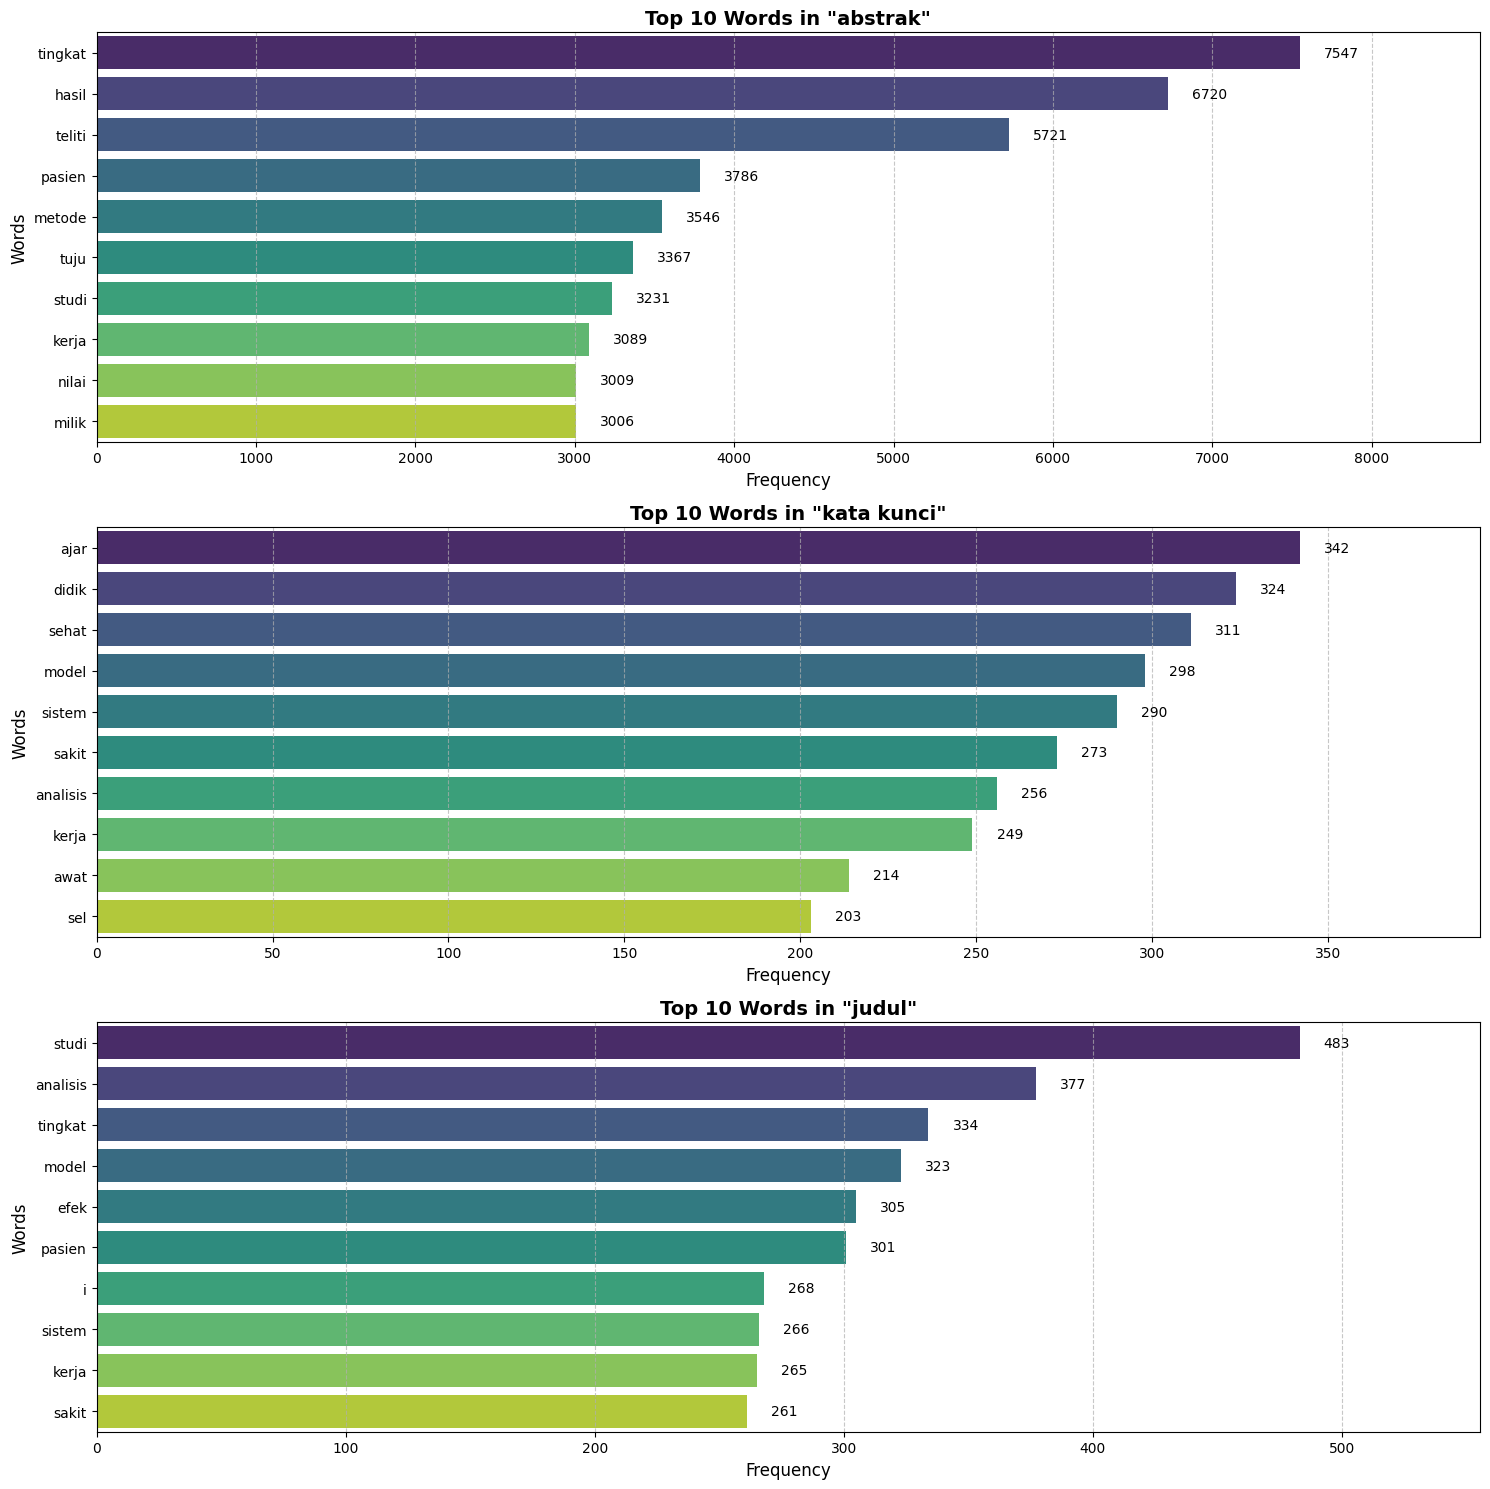

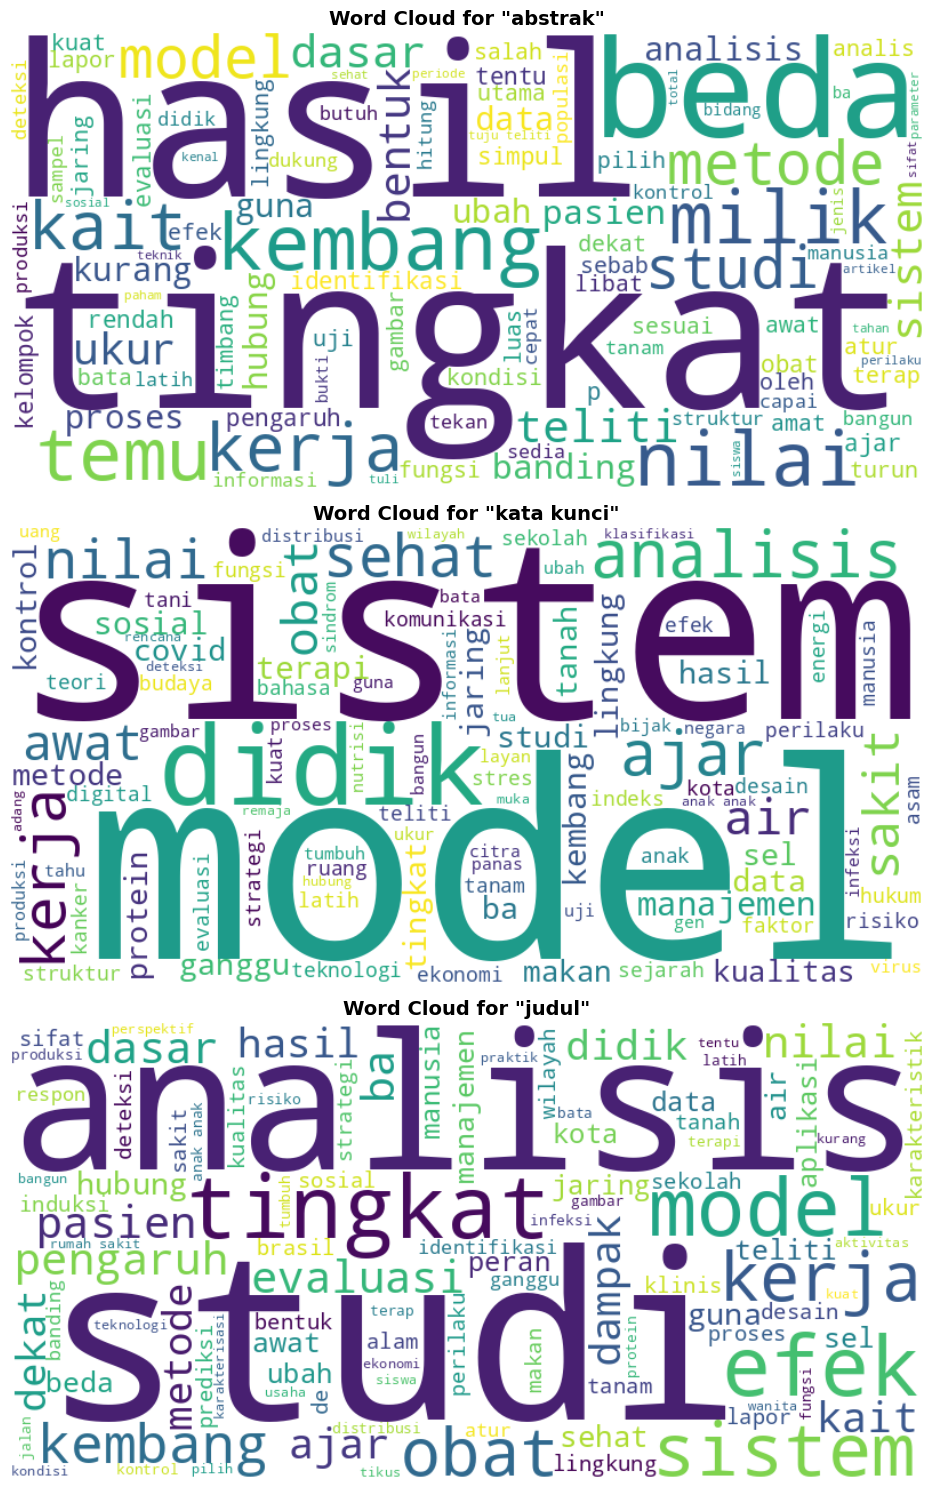

In [ ]:
# Identify text columns in df2
# This is a guess - you'll need to specify your actual text columns
text_columns = [col for col in df3.columns if df3[col].dtype == 'object']

# If you know your text columns, you can specify them directly:
# text_columns = ['title', 'description', 'content', ...]

# Create visualizations
plot_top_words_for_df3(df3, text_columns)

# Create word clouds
create_wordclouds_for_df3(df3, text_columns)

## Penerbit

<ipython-input-11-1852749154>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='penerbit', data=top_10_penerbit, palette='viridis')


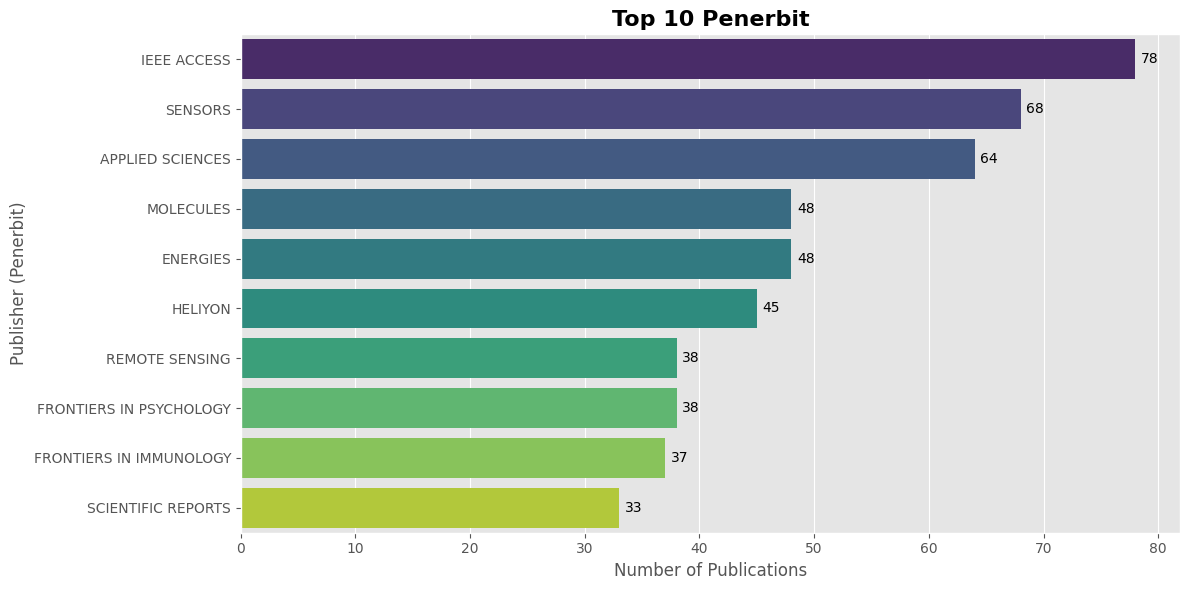

Top 10 Publishers (Penerbit) by Publication Count:
                  penerbit  count
0              IEEE ACCESS     78
1                  SENSORS     68
2         APPLIED SCIENCES     64
3                MOLECULES     48
4                 ENERGIES     48
5                  HELIYON     45
6           REMOTE SENSING     38
7  FRONTIERS IN PSYCHOLOGY     38
8  FRONTIERS IN IMMUNOLOGY     37
9       SCIENTIFIC REPORTS     33


In [ ]:
# Ensure we have proper styling and size for the visualization
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

# Count the frequency of each publisher
penerbit_counts = df_cleaned['penerbit'].value_counts().reset_index()
penerbit_counts.columns = ['penerbit', 'count']

# Get the top 10 publishers
top_10_penerbit = penerbit_counts.head(10)

# Create a bar plot
sns.barplot(x='count', y='penerbit', data=top_10_penerbit, palette='viridis')

# Add labels and title
plt.title('Top 10 Penerbit', fontsize=16, fontweight='bold')
plt.xlabel('Number of Publications', fontsize=12)
plt.ylabel('Publisher (Penerbit)', fontsize=12)

# Add count values at the end of each bar
for i, v in enumerate(top_10_penerbit['count']):
    plt.text(v + 0.5, i, str(v), va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the data for the top 10 publishers
print("Top 10 Publishers (Penerbit) by Publication Count:")
print(top_10_penerbit)

# Modeling K-Means

In [ ]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("dataset baku.csv")

### Perbandingan menggunakan package

Untuk k=2, Silhouette Score: 0.009098735592622958
Untuk k=3, Silhouette Score: 0.010857621148543009
Untuk k=4, Silhouette Score: 0.013238807985664243
Untuk k=5, Silhouette Score: 0.01435315949531759
Untuk k=6, Silhouette Score: 0.014769572459468468
Untuk k=7, Silhouette Score: 0.015393718358620809
Untuk k=8, Silhouette Score: 0.017283114129217483
Untuk k=9, Silhouette Score: 0.017299662974641142
Untuk k=10, Silhouette Score: 0.019183411950608454

Jumlah klaster terbaik berdasarkan Silhouette Score: k = 10 (Score: 0.0192)

Hasil Klasterisasi (Beberapa Baris Pertama):
                                       combined_text  cluster_label
0  pancing predasi suhu drive herring turun ekosi...              0
1  migran negara rusia abad peluang batas migrasi...              2
2  memori sejarah lisan waris immaterial afrobras...              2
3  kembang kontrol hibrida eksoskeleton ekstremit...              1
4  inklusi sertifikat kompetensi inklusi bentuk g...              3

Jumlah Data per Kl

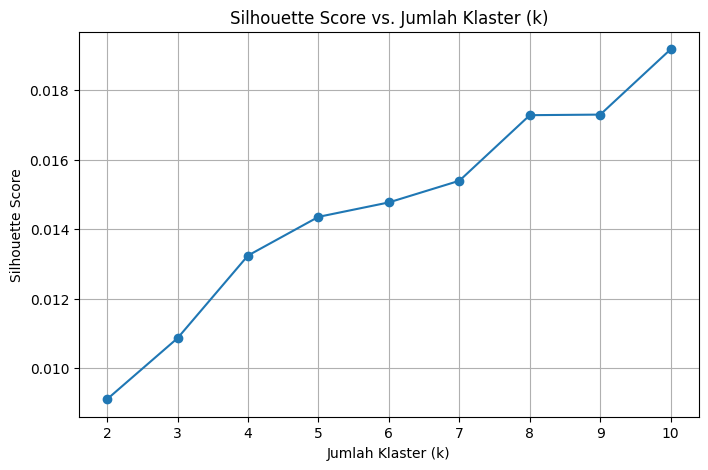

In [ ]:
# prompt: gunakan kmeans untuk klastering df, dan buatkan silhouetescorenya

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Gabungkan kolom teks yang sudah diproses
df['combined_text'] = df['judul_stemmed'].fillna('') + ' ' + df['kata kunci_stemmed'].fillna('') + ' ' + df['abstrak_stemmed'].fillna('')

# Lakukan vektorisasi TF-IDF pada teks gabungan
tfidf_vectorizer = TfidfVectorizer(max_features=1000) # Batasi fitur untuk komputasi yang lebih cepat
X_tfidf = tfidf_vectorizer.fit_transform(df['combined_text'])

# Konversi ke array NumPy jika diperlukan (KMeans di scikit-learn lebih efisien dengan array)
X = X_tfidf.toarray()

# Tentukan rentang jumlah klaster yang akan diuji
# Pilih rentang yang masuk akal berdasarkan pemahaman data Anda.
# Hindari k=1 (siluet score tidak terdefinisi) dan k=jumlah data (setiap data adalah klaster sendiri)
k_range = range(2, 11) # Contoh: uji dari 2 sampai 10 klaster

# List untuk menyimpan silhouette scores
silhouette_scores = []

# Lakukan K-Means untuk setiap nilai k dan hitung silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init=10 untuk mengurangi dampak inisialisasi
    kmeans.fit(X)
    labels = kmeans.labels_

    # Pastikan ada lebih dari 1 klaster yang terbentuk
    if len(set(labels)) > 1:
      score = silhouette_score(X, labels)
      silhouette_scores.append(score)
      print(f"Untuk k={k}, Silhouette Score: {score}")
    else:
      print(f"Untuk k={k}, hanya 1 klaster yang terbentuk, tidak dapat menghitung Silhouette Score.")
      silhouette_scores.append(-1) # Beri nilai -1 atau NaN jika tidak bisa dihitung


# Temukan k dengan silhouette score terbaik
best_k_index = np.argmax(silhouette_scores)
best_k = k_range[best_k_index]
best_score = silhouette_scores[best_k_index]

print(f"\nJumlah klaster terbaik berdasarkan Silhouette Score: k = {best_k} (Score: {best_score:.4f})")

# Terapkan K-Means dengan jumlah klaster terbaik
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster_label'] = final_kmeans.fit_predict(X)

# Tampilkan hasil klasterisasi (misalnya, beberapa baris pertama dengan label klaster)
print("\nHasil Klasterisasi (Beberapa Baris Pertama):")
print(df[['combined_text', 'cluster_label']].head())

# Tampilkan jumlah data per klaster
print("\nJumlah Data per Klaster:")
print(df['cluster_label'].value_counts().sort_index())

# Visualisasikan Silhouette Scores (Opsional)
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Jumlah Klaster (k)')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [ ]:
df

Unnamed: 0                                              judul  \
0              0  pancing predasi suhu drive herring turun ekosi...   
1              1             migran negara rusia abad peluang batas   
2              2  memori sejarah lisan waris immaterial afrobras...   
3              3  kembang kontrol hibrida eksoskeleton ekstremit...   
4              4                      inklusi sertifikat kompetensi   
...          ...                                                ...   
6720        6720           periksa alas poligami tampil transeksual   
6721        6721  program pulih tingkat bedah kanker paru tinjau...   
6722        6722  expeemimnttal itetitit expave nrrut effc nal p...   
6723        6723  skor beaf skor stratifikasi risiko pasien gaga...   
6724        6724  kaya buah zaitun kandung antioksidan obat asam...   

                                             kata kunci  \
0     herring atlantik ubah iklim ekosistem bas ekos...   
1     migrasi rezim migrasi praktik migrasi kerja mu...   
2                 ingat sejarah lisan waris wujud teori   
3     exoskeleton ekstremitas desain sistem niat ger...   
4         inklusi bentuk guru praktik cermin ajar letak   
...                                                 ...   
6720    pandang jender poligami minat jender tuju nikah   
6721  tingkat pulih operasi operasi kanker paruparu ...   
6722    nudiili ng pudulolut box expas nrout grrot pcre   
6723  ekokardiografi gagal jantung praklinis stratif...   
6724  zaitun phytoregulator polifenol aktivitas pulu...   

                                                abstrak  \
0     abstrak darat herring atlantik besar spesies l...   
1     artikel lanjut tema migran sah angkat l siegel...   
2     artikel hubung ingat sejarah lisan waris wujud...   
3     makalah desain sistem algoritma kontrol hibrid...   
4     artikel tinjau konseptual kait konten kompeten...   
...                                                 ...   
6720  urut korup pandang diskriminatif gender kritik...   
6721  shuangjiang li kun zhou guowei che mei jianhua...   
6722  minta deban life increach kembang eksetasi par...   
6723  latar tahap gagal jantung hf acu sakit jantung...   
6724  ajar pengaruh aplikasi asam salisilat prapanen...   

                                               penerbit tanggal publikasi  \
0                                 ECOLOGY AND EVOLUTION          DEC 2021   
1                                      QUAESTIO ROSSICA          APR 2018   
2                                        REVISTA ODEERE          MAR 2017   
3                                           IEEE ACCESS          JAN 2019   
4                   HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019   
...                                                 ...               ...   
6720                                 فقه و حقوق خانواده          APR 2023   
6721                     CANCER MANAGEMENT AND RESEARCH          NOV 2017   
6722                                  مهندسی عمران شریف          AUG 2020   
6723  JOURNAL OF THE AMERICAN HEART ASSOCIATION: CAR...          OCT 2024   
6724                                              FOODS          OCT 2020   

                                          judul_stemmed  \
0     pancing predasi suhu drive herring turun ekosi...   
1                migran negara rusia abad peluang batas   
2     memori sejarah lisan waris immaterial afrobras...   
3     kembang kontrol hibrida eksoskeleton ekstremit...   
4                         inklusi sertifikat kompetensi   
...                                                 ...   
6720           periksa alas poligami tampil transeksual   
6721  program pulih tingkat bedah kanker paru tinjau...   
6722  expeemimnttal itetitit expave nrrut effc nal p...   
6723  skor beaf skor stratifikasi risiko pasien gaga...   
6724  kaya buah zaitun kandung antioksidan obat asam...   

                                     kata kunci_stemmed  \
0     herring atlantik ubah iklim ekosiste

## Prepocessing ulang

In [ ]:
# Menangani missing value dengan mengisi string kosong
df['judul'] = df['judul'].fillna("")
df['kata kunci'] = df['kata kunci'].fillna("")
df['abstrak'] = df['abstrak'].fillna("")

# Memastikan semua nilai di kolom tersebut adalah string
df['judul'] = df['judul'].astype(str)
df['kata kunci'] = df['kata kunci'].astype(str)
df['abstrak'] = df['abstrak'].astype(str)

print("Missing values setelah penanganan:")
print(df.isnull().sum())


Missing values setelah penanganan:
judul                0
kata kunci           0
abstrak              0
penerbit             0
tanggal publikasi    0
dtype: int64


### TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['abstrak'])
X = X_tfidf.toarray()  # Array numpy

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Contoh standardisasi (mean=0, std=1) pada fitur TF-IDF (X dari langkah sebelumnya)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nHasil Standardisasi (TF-IDF features):\n", X_scaled[:5]) # Tampilkan 5 baris pertama

# Contoh normalisasi (scaling to a [0, 1] range) pada fitur TF-IDF
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X)
print("\nHasil Normalisasi (TF-IDF features):\n", X_normalized[:5]) # Tampilkan 5 baris pertama


Hasil Standardisasi (TF-IDF features):
 [[-0.13906673  1.89980902 -0.19842885 ... -0.10246109 -0.10415385
  -0.09800808]
 [10.89494305 -0.24569008 -0.19842885 ... -0.10246109 -0.10415385
  -0.09800808]
 [-0.13906673 -0.24569008 -0.19842885 ... 23.22857902 -0.10415385
  -0.09800808]
 [-0.13906673 -0.24569008 -0.19842885 ... -0.10246109 -0.10415385
  -0.09800808]
 [-0.13906673 -0.24569008 -0.19842885 ... -0.10246109 -0.10415385
  -0.09800808]]

Hasil Normalisasi (TF-IDF features):
 [[0.         0.0731807  0.         ... 0.         0.         0.        ]
 [0.54939254 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.8927204  0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## test

In [ ]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def kmeans_manual(X, k, max_iters=100):
    np.random.seed(42)
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for i, x in enumerate(X):
            closest_centroid = np.argmin([euclidean_distance(x, c) for c in centroids])
            clusters[closest_centroid].append(i)

        new_centroids = np.array([
            X[cluster].mean(axis=0) if cluster else centroids[i]
            for i, cluster in enumerate(clusters)
        ])

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    inertia = 0
    for i in range(k):
        inertia += sum(np.linalg.norm(X[j] - centroids[i]) ** 2 for j in clusters[i])

    return inertia

### Menggunakan cosine


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity # Import fungsi cosine_similarity

def cosine_distance(a, b):
    # cosine_similarity mengembalikan nilai antara -1 (sangat tidak mirip) dan 1 (sangat mirip)
    # Jarak adalah 1 - similarity. Pastikan input adalah array 2D untuk cosine_similarity
    return 1 - cosine_similarity([a], [b])[0][0]

def kmeans_manual_cosine(X, k, max_iters=100):
    np.random.seed(42)
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for i, x in enumerate(X):
            # Hitung jarak menggunakan cosine_distance
            closest_centroid = np.argmin([cosine_distance(x, c) for c in centroids])
            clusters[closest_centroid].append(i)

        new_centroids = np.array([
            X[cluster].mean(axis=0) if cluster else centroids[i]
            for i, cluster in enumerate(clusters)
        ])

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    inertia = 0
    # Perhitungan "inertia" (jarak kuadrat ke centroid terdekat)
    # Perlu disesuaikan jika menggunakan cosine distance,
    # tetapi untuk metrik internal seperti silhouette, metrik yang digunakan saat clustering lebih penting.
    # Untuk evaluasi silhouette, scikit-learn akan menghitung jarak antar titik data
    # menggunakan metrik yang Anda tentukan saat menghitung silhouette_score.

    return inertia # Inertia mungkin kurang bermakna langsung dengan cosine distance

# Fungsi untuk mendapatkan label dengan cosine distance
def kmeans_manual_cosine_labels(X, k, max_iters=100):
    np.random.seed(42)
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        labels = []
        for x in X:
            # Hitung jarak menggunakan cosine_distance
            closest_centroid = np.argmin([cosine_distance(x, c) for c in centroids])
            labels.append(closest_centroid)

        new_centroids = []
        for i in range(k):
            points = [X[j] for j in range(len(X)) if labels[j] == i]
            if points:
                new_centroids.append(np.mean(points, axis=0))
            else:
                new_centroids.append(centroids[i])  # jika kosong, tetap

        new_centroids = np.array(new_centroids)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels

In [ ]:
k_clusters = 5

# Apply the manual K-Means clustering with cosine distance
print(f"Applying K-Means clustering with k={k_clusters} using cosine distance...")
cluster_labels_cosine = kmeans_manual_cosine_labels(X, k=k_clusters)

# Add the cluster labels to your DataFrame
df['klaster_kmeans_cosine'] = cluster_labels_cosine

print("\nDataFrame with new cluster labels (cosine distance):")
print(df.head())

# You can also check the distribution of data points across the new clusters
print("\nNumber of data points per cluster (cosine distance):")
print(df['klaster_kmeans_cosine'].value_counts().sort_index())

Applying K-Means clustering with k=5 using cosine distance...

DataFrame with new cluster labels (cosine distance):
   Unnamed: 0                                              judul  \
0           0  pancing predasi suhu drive herring turun ekosi...   
1           1             migran negara rusia abad peluang batas   
2           2  memori sejarah lisan waris immaterial afrobras...   
3           3  kembang kontrol hibrida eksoskeleton ekstremit...   
4           4                      inklusi sertifikat kompetensi   

                                          kata kunci  \
0  herring atlantik ubah iklim ekosistem bas ekos...   
1  migrasi rezim migrasi praktik migrasi kerja mu...   
2              ingat sejarah lisan waris wujud teori   
3  exoskeleton ekstremitas desain sistem niat ger...   
4      inklusi bentuk guru praktik cermin ajar letak   

                                             abstrak  \
0  abstrak darat herring atlantik besar spesies l...   
1  artikel lanjut tema mig

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have the feature matrix X (from TF-IDF or embeddings)
# and the cluster labels in the 'klaster_kmeans_cosine' column of your df.

# Get the cluster labels from the DataFrame
cluster_labels = df['klaster_kmeans_cosine']

# Check if there is more than one cluster and more than one sample,
# as Silhouette Score is not defined otherwise.
if len(set(cluster_labels)) > 1 and len(cluster_labels) > 1:
    # Calculate the Silhouette Score
    # We specify the metric as 'cosine' because the clustering was done using cosine distance.
    silhouette_avg = silhouette_score(X, cluster_labels, metric='cosine')

    print(f"Silhouette Score for K-Means with Cosine Distance: {silhouette_avg:.4f}")
else:
    print("Cannot compute Silhouette Score: Need more than one cluster and more than one sample.")
    print(f"Number of clusters found: {len(set(cluster_labels))}")
    print(f"Number of samples: {len(cluster_labels)}")

Silhouette Score for K-Means with Cosine Distance: 0.0244


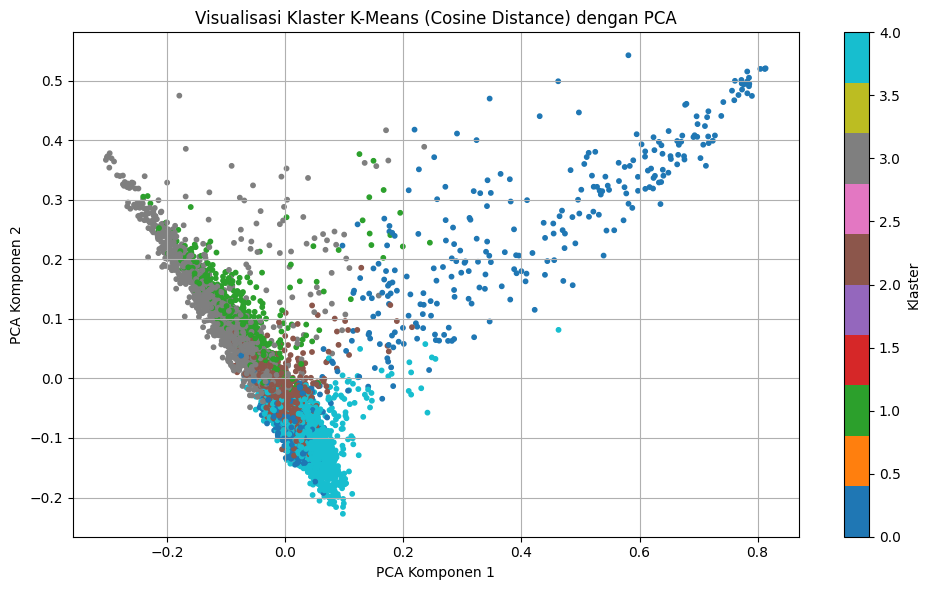


Generating Word Clouds for each cluster based on 'abstrak' column...


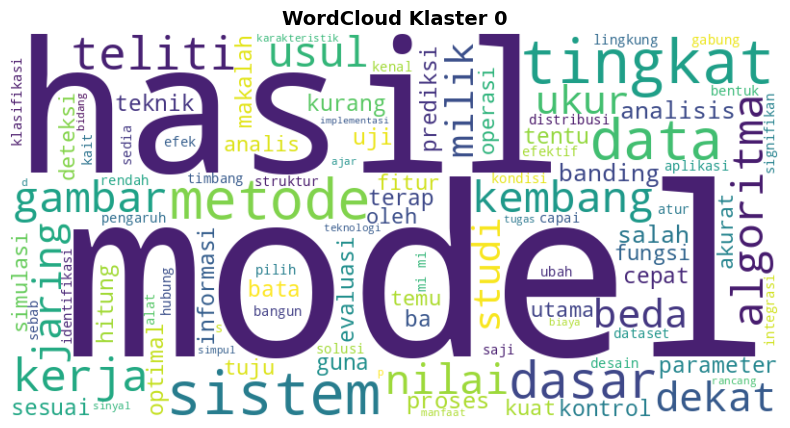

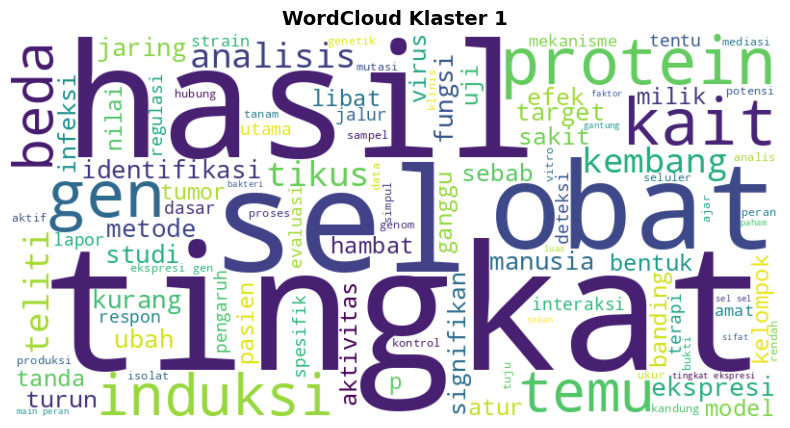

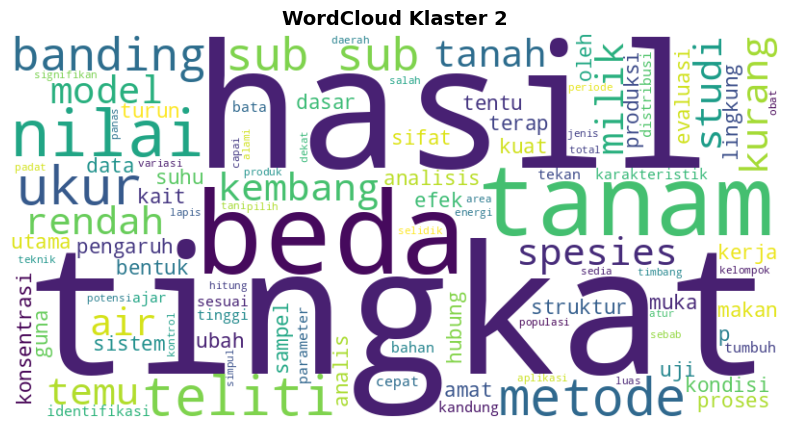

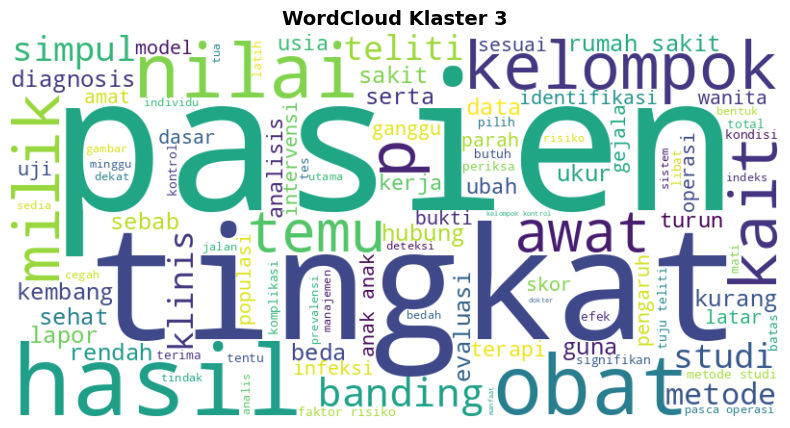

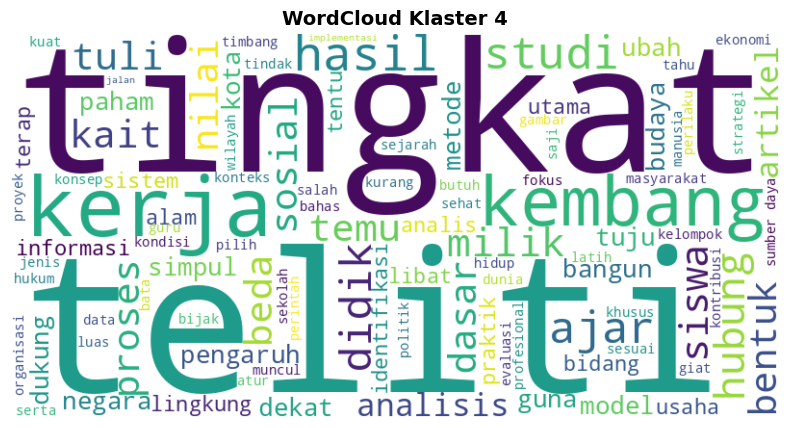

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- 1. Visualize Clusters using PCA ---

# Reduksi dimensi X (your feature matrix) ke 2D menggunakan PCA
# We'll use the same random state for reproducibility as in previous steps if possible
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the clustered data in 2D
plt.figure(figsize=(10, 6))
# Use the cluster labels from the df
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['klaster_kmeans_cosine'], cmap='tab10', s=10)
plt.title("Visualisasi Klaster K-Means (Cosine Distance) dengan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
# Add a color bar to map cluster colors to cluster numbers
colorbar = plt.colorbar(scatter, label="Klaster")
# Ensure the color bar ticks correspond to the actual cluster numbers if they are integers
if all(isinstance(i, int) for i in df['klaster_kmeans_cosine'].unique()):
     colorbar.set_ticks(sorted(df['klaster_kmeans_cosine'].unique()))

plt.grid(True)
plt.tight_layout()
plt.show()


# --- 2. Visualize Cluster Themes using Word Clouds ---

# Make sure the column used for text is available and is a string type
# Based on previous steps, 'abstrak' was used for TF-IDF, let's use the stemmed version if available and preferred
# or the original cleaned version used for embedding.
# Let's assume 'abstrak' (after cleaning/preprocessing but before stemming) is the column representative of the text content.
# If you used 'abstrak_stemmed' for vectorization, you might prefer to use that for WordCloud
text_column_for_wordcloud = 'abstrak' # Or 'abstrak_stemmed'

if text_column_for_wordcloud not in df.columns:
    print(f"Error: Column '{text_column_for_wordcloud}' not found in DataFrame for WordClouds.")
else:
    # Ensure the text column is string type and handle potential NaNs
    df[text_column_for_wordcloud] = df[text_column_for_wordcloud].fillna("").astype(str)

    # Create WordCloud for each cluster
    print(f"\nGenerating Word Clouds for each cluster based on '{text_column_for_wordcloud}' column...")
    for k in sorted(df['klaster_kmeans_cosine'].unique()):
        # Filter DataFrame for current cluster and get the text data
        teks_klaster = ' '.join(df[df['klaster_kmeans_cosine'] == k][text_column_for_wordcloud])

        # Only generate if there is text data in the cluster
        if teks_klaster.strip():
            # Create WordCloud
            wordcloud = WordCloud(width=800, height=400,
                                 background_color='white',
                                 colormap='viridis', # Or 'tab10' to match scatter plot colors
                                 max_words=100, # Limit the number of words
                                 contour_width=2,
                                 contour_color='steelblue',
                                 random_state=42).generate(teks_klaster)

            # Display the WordCloud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off') # Hide axes
            plt.title(f'WordCloud Klaster {k}', fontsize=14, fontweight='bold')
            plt.show()
        else:
            print(f"  Klaster {k} has no text data to generate a WordCloud.")

## Elbow

Memproses K=1 ...
Memproses K=2 ...
Memproses K=3 ...
Memproses K=4 ...
Memproses K=5 ...
Memproses K=6 ...
Memproses K=7 ...
Memproses K=8 ...
Memproses K=9 ...
Memproses K=10 ...


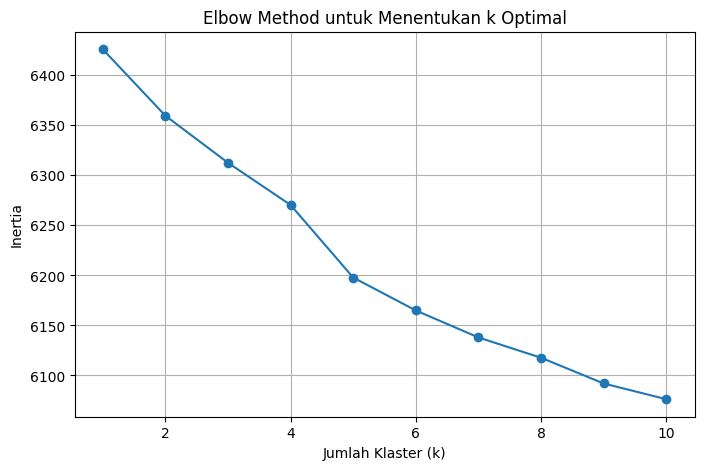

In [ ]:
inertias = []
K_range = range(1, 11)
for k in K_range:
    print(f"Memproses K={k} ...")
    inertia = kmeans_manual(X, k)
    inertias.append(inertia)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Penerapan

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def kmeans_manual_iterative(X_scaled, k, max_iters=100):
    np.random.seed(42)
    indices = np.random.choice(len(X_scaled), k, replace=False)
    centroids = X_scaled[indices]

    for iteration in range(max_iters):
        labels = []
        for x in X_scaled:
            closest_centroid = np.argmin([euclidean_distance(x, c) for c in centroids])
            labels.append(closest_centroid)

        new_centroids = []
        cluster_counts = [0] * k
        for i in range(k):
            points = [X_scaled[j] for j in range(len(X)) if labels[j] == i]
            cluster_counts[i] = len(points)
            if points:
                new_centroids.append(np.mean(points, axis=0))
            else:
                new_centroids.append(centroids[i])  # jika kosong, tetap

        new_centroids = np.array(new_centroids)

        # Check for homogeneity (all points assigned to one cluster)
        if any(count == len(X_Scaled) for count in cluster_counts):
          print(f" Hasil homogen pada iterasi ke- {iteration+1}. Semua titik berasda di satu klasster")
            return labels, iteration + 1 # Return labels and iteration number


        if np.allclose(centroids, new_centroids):
            print(f"Konvergensi tercapai pada iterasi ke-{iteration + 1}")
            return labels, iteration + 1 # Return labels and iteration number

        centroids = new_centroids

    print(f"Mencapai batas iterasi ({max_iters}) tanpa konvergensi atau homogenitas penuh.")
    return labels, max_iters # Return labels and max iterations

In [ ]:
# Penerapan K-Means dengan pelacakan iterasi
print("Memulai K-Means dengan k=5 dan melacak iterasi...")
labels_k5, iter_converged = kmeans_manual_iterative(X, k=5)

# Tambahkan label klaster ke DataFrame
df['klaster'] = labels_k5

# Tampilkan beberapa hasil
print("\nHasil Klasterisasi (beberapa baris pertama):")
print(df[['judul', 'klaster']].head())

# Tampilkan jumlah data per klaster
print("\nJumlah data per klaster:")
print(df['klaster'].value_counts().sort_index())


Memulai K-Means dengan k=5 dan melacak iterasi...
Konvergensi tercapai pada iterasi ke-29

Hasil Klasterisasi (beberapa baris pertama):
                                               judul  klaster
0  pancing predasi suhu drive herring turun ekosi...        2
1             migran negara rusia abad peluang batas        4
2  memori sejarah lisan waris immaterial afrobras...        4
3  kembang kontrol hibrida eksoskeleton ekstremit...        2
4                      inklusi sertifikat kompetensi        4

Jumlah data per klaster:
klaster
0     195
1     512
2    2776
3    1159
4    2083
Name: count, dtype: int64


In [ ]:

from collections import Counter
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Tampilkan 5 sampel kata untuk masing-masing klaster
print("\nSampel Kata dari Setiap Klaster:")

# Iterasi melalui setiap klaster yang teridentifikasi
for cluster_id in sorted(df['klaster'].unique()):
    if cluster_id == -1: # DBSCAN might produce noise cluster -1
        print(f"\nKlaster Noise (-1):")
        # You might not want to show words for noise, or show words from a few noise samples
        continue

    print(f"\nKlaster {cluster_id}:")

    # Filter DataFrame untuk klaster saat ini
    cluster_df = df[df['klaster'] == cluster_id]
    text_column = 'abstrak' # Ganti jika Anda menggunakan kolom lain seperti 'combined_text'

    if text_column in cluster_df.columns:
        # Gabungkan semua teks dalam klaster menjadi satu string
        all_text_in_cluster = ' '.join(cluster_df[text_column].fillna('').astype(str))

        # Tokenisasi teks (gunakan metode tokenisasi yang Anda gunakan sebelumnya, misal simple_tokenize atau split)
        # Di sini kita asumsikan menggunakan split setelah preprocessing yang menghasilkan string kata-kata
        words = all_text_in_cluster.split()

        # Hitung frekuensi kata
        word_counts = Counter(words)

        # Ambil 5 kata yang paling sering muncul
        top_words = word_counts.most_common(5)

        # Tampilkan kata-kata tersebut
        if top_words:
            print([word for word, count in top_words])
        else:
            print("Tidak ada kata untuk ditampilkan di klaster ini.")
    else:
        print(f"Kolom teks '{text_column}' tidak ditemukan dalam DataFrame klaster.")


Sampel Kata dari Setiap Klaster:

Klaster 0:
['the', 'of', 'and', 'in', 'to']

Klaster 1:
['sel', 'tingkat', 'ekspresi', 'gen', 'hasil']

Klaster 2:
['tingkat', 'hasil', 'metode', 'model', 'teliti']

Klaster 3:
['pasien', 'tingkat', 'hasil', 'sakit', 'p']

Klaster 4:
['teliti', 'kerja', 'tingkat', 'hasil', 'ajar']


In [ ]:
df4 = pd.read_excel("data irma.xlsx")

In [ ]:
df_clustered_titles = df4[['Title']].copy()
df_clustered_titles['klaster'] = df['klaster'] # Tambahkan kolom klaster dari df yang sudah ada

print("\nDataFrame dengan Judul dan Label Klaster:")
print(df_clustered_titles.head())

# Tampilkan judul dari df4 untuk masing-masing klaster dan ambil 5 sample
print("\nContoh Judul (5 sampel) untuk Setiap Klaster:")
for cluster_id in sorted(df_clustered_titles['klaster'].unique()):
    print(f"\nKlaster {cluster_id}:")
    # Filter DataFrame untuk klaster saat ini
    cluster_data = df_clustered_titles[df_clustered_titles['klaster'] == cluster_id]

    if not cluster_data.empty:
        # Ambil 5 sampel judul dari klaster ini
        sample_titles = cluster_data['Title'].sample(min(5, len(cluster_data)), random_state=42) # Ambil 5 atau kurang jika data kurang dari 5
        for i, title in enumerate(sample_titles):
            print(f"  {i+1}. {title}")
    else:
        print("  Tidak ada data di klaster ini.")



DataFrame dengan Judul dan Label Klaster:
                                               Title  klaster
0  Fishing, predation, and temperature drive herr...      2.0
1  Management of Ureters Involved in Inguinal Her...      4.0
2  Factors predicting active treatment free-survi...      4.0
3  Мигранты и Российское государство в XX веке: в...      2.0
4  Memória, História Oral e Patrimônio Imaterial ...      4.0

Contoh Judul (5 sampel) untuk Setiap Klaster:

Klaster 0.0:
  1. Research on the Spatial Correlation and Influence Factors of Regional Internet Finance in China
  2. INFORMACIÓN NACIONAL Y EXTRANJERA
  3. Study the Effectiveness of Implementing Quality Management System In the Corporations Won the ISO Certificate (Case Study: The Ministry of Energy’s Subsidiaries in Isfahan)
  4. The Value of Decision Making to the Airlines: An Analysis of Passenger Preferences on Check-ins
  5. PENERAPAN MODEL KELOMPOK USAHA KREATIF ISLAMI (KUKIS) DALAM PEMBERDAYAAN PEREMPUAN BERBASIS PONDOK P

In [ ]:
df4['klaster_kmeans'] = df['klaster']

df4.to_csv('df4_with_kmeans_clusters.csv', index=False)



DataFrame df4 setelah ditambahkan kolom klaster hasil K-Means:
                                               Title  \
0  Fishing, predation, and temperature drive herr...   
1  Management of Ureters Involved in Inguinal Her...   
2  Factors predicting active treatment free-survi...   
3  Мигранты и Российское государство в XX веке: в...   
4  Memória, História Oral e Patrimônio Imaterial ...   

                                            Keywords  \
0  Atlantic herring,, climate change,, ecosystem,...   
1                              No keywords available   
2                              No keywords available   
3  миграция; миграционные режимы; миграционные пр...   
4  Memória,, História Oral,, Patrimônio Imaterial...   

                                            Abstract  \
0  Abstract Since 1960, landings of Atlantic herr...   
1  Background: The presence of a ureter in a hern...   
2                              No abstract available   
3  Статья продолжает тему «самовольных

In [ ]:
df_clustered_titles.to_csv('df_clustered_titles2.csv', index=False)

## Visualisasi

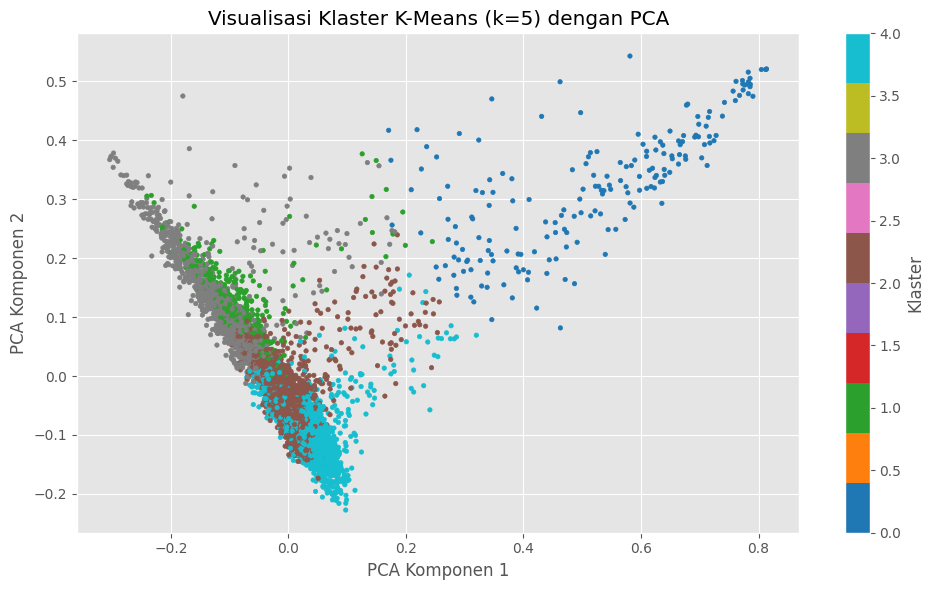

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi TF-IDF ke 2D menggunakan PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Buat plot scatter klasterisasi
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['klaster'], cmap='tab10', s=10)
plt.title("Visualisasi Klaster K-Means (k=5) dengan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.colorbar(scatter, label="Klaster")
plt.grid(True)
plt.tight_layout()
plt.show()

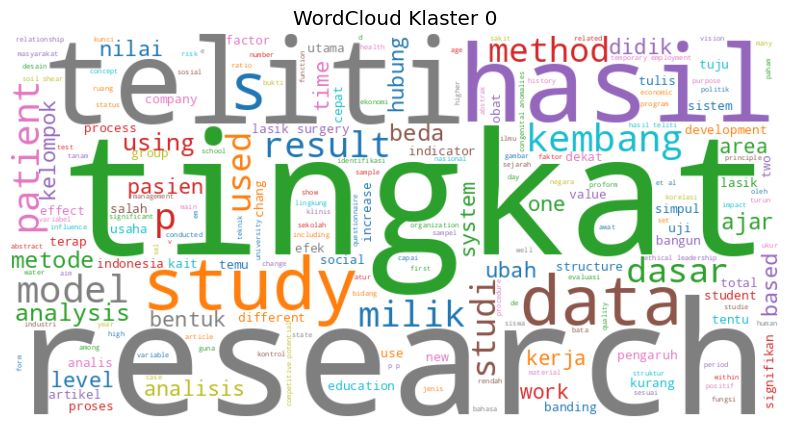

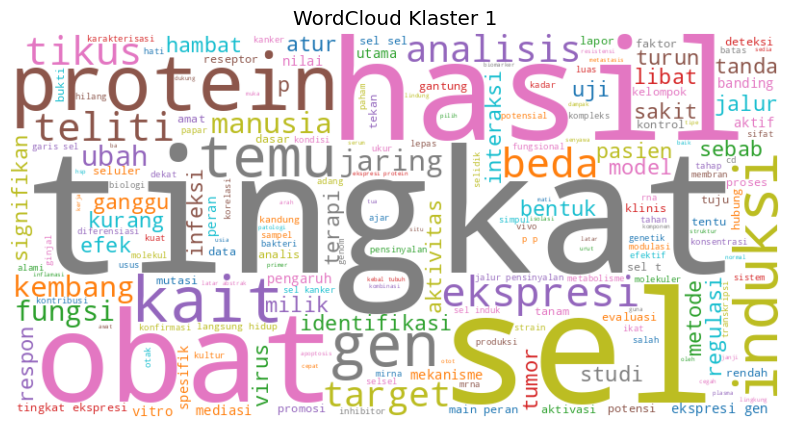

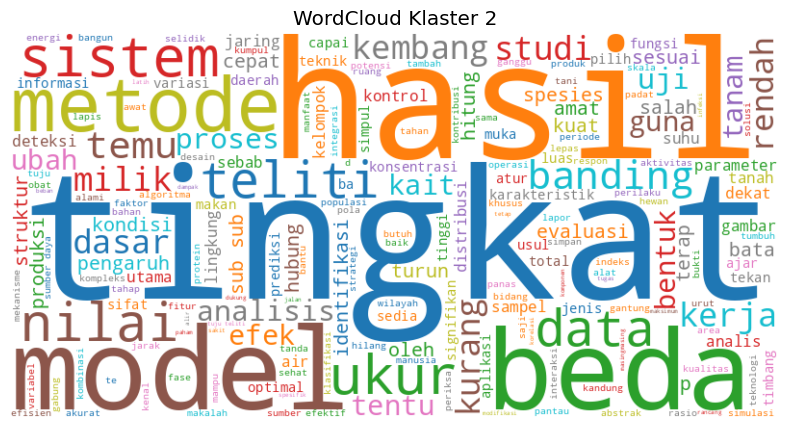

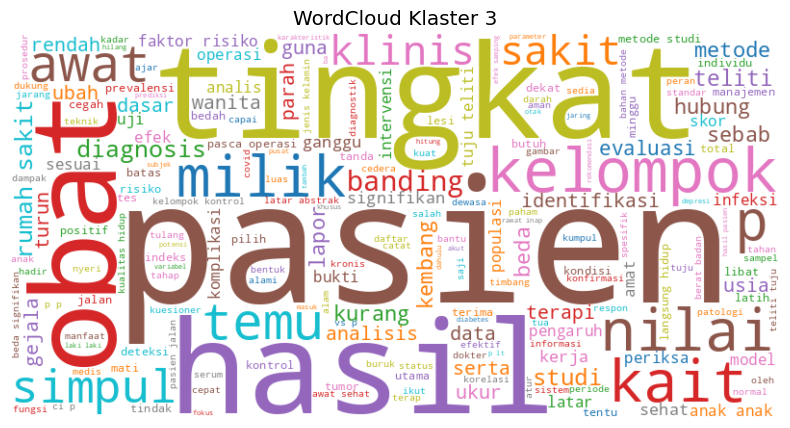

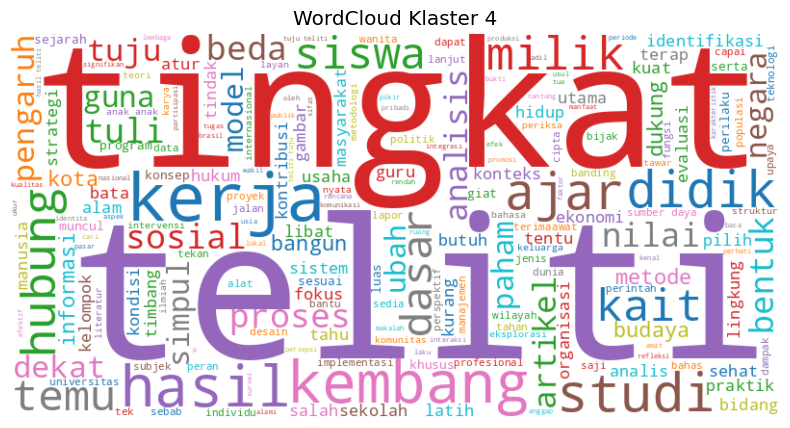

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan kolom 'klaster' sudah ada dan 'teks_bersih' sudah tersedia

# Buat WordCloud untuk setiap klaster
for k in sorted(df['klaster'].unique()):
    # Gabungkan semua teks dalam satu klaster
    teks_klaster = ' '.join(df[df['klaster'] == k]['abstrak'])

    # Buat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(teks_klaster)

    # Tampilkan
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud Klaster {k}')
    plt.show()


# **Modelling** BERT

In [ ]:
!pip install transformers scikit-learn pandas

In [ ]:
df_cleaned

judul  \
0     pancing predasi suhu drive herring turun ekosi...   
1                migran negara rusia abad peluang batas   
2     memori sejarah lisan waris immaterial afrobras...   
3     kembang kontrol hibrida eksoskeleton ekstremit...   
4                         inklusi sertifikat kompetensi   
...                                                 ...   
6720           periksa alas poligami tampil transeksual   
6721  program pulih tingkat bedah kanker paru tinjau...   
6722  expeemimnttal itetitit expave nrrut effc nal p...   
6723  skor beaf skor stratifikasi risiko pasien gaga...   
6724  kaya buah zaitun kandung antioksidan obat asam...   

                                             kata kunci  \
0     herring atlantik ubah iklim ekosistem bas ekos...   
1     migrasi rezim migrasi praktik migrasi kerja mu...   
2                 ingat sejarah lisan waris wujud teori   
3     exoskeleton ekstremitas desain sistem niat ger...   
4         inklusi bentuk guru praktik cermin ajar letak   
...                                                 ...   
6720    pandang jender poligami minat jender tuju nikah   
6721  tingkat pulih operasi operasi kanker paruparu ...   
6722    nudiili ng pudulolut box expas nrout grrot pcre   
6723  ekokardiografi gagal jantung praklinis stratif...   
6724  zaitun phytoregulator polifenol aktivitas pulu...   

                                                abstrak  \
0     abstrak darat herring atlantik besar spesies l...   
1     artikel lanjut tema migran sah angkat l siegel...   
2     artikel hubung ingat sejarah lisan waris wujud...   
3     makalah desain sistem algoritma kontrol hibrid...   
4     artikel tinjau konseptual kait konten kompeten...   
...                                                 ...   
6720  urut korup pandang diskriminatif gender kritik...   
6721  shuangjiang li kun zhou guowei che mei jianhua...   
6722  minta deban life increach kembang eksetasi par...   
6723  latar tahap gagal jantung hf acu sakit jantung...   
6724  ajar pengaruh aplikasi asam salisilat prapanen...   

                                               penerbit tanggal publikasi  
0                                 ECOLOGY AND EVOLUTION          DEC 2021  
1                                      QUAESTIO ROSSICA          APR 2018  
2                                        REVISTA ODEERE          MAR 2017  
3                                           IEEE ACCESS          JAN 2019  
4                   HERAUSFORDERUNG LEHRER*INNENBILDUNG          NOV 2019  
...                                                 ...               ...  
6720                                 فقه و حقوق خانواده          APR 2023  
6721                     CANCER MANAGEMENT AND RESEARCH          NOV 2017  
6722                                  مهندسی عمران شریف          AUG 2020  
6723  JOURNAL OF THE AMERICAN HEART ASSOCIATION: CAR...          OCT 2024  
6724                                              FOODS          OCT 2020  

[6697 rows x 5 columns]

In [ ]:
import pandas as pd

# Contoh data
data = df_cleaned['abstrak'].dropna().tolist()  # Menggunakan kolom 'abstrak'

## Membuat Embedding dengan BERT

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load tokenizer dan model BERT
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Fungsi untuk menghasilkan embedding
def get_bert_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Generate embedding untuk seluruh data
embeddings = [get_bert_embedding(text, tokenizer, model) for text in data]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### Menghitung Kemiripan Kosinus

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity([embeddings[0]], [embeddings[1]])
print(f"Kesamaan antara kalimat 1 dan 2: {similarity[0][0]}")

Kesamaan antara kalimat 1 dan 2: 0.9173712134361267


In [ ]:
# 5. Hitung cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# 6. Buat DataFrame untuk tabel similarity
df_similarity = pd.DataFrame(similarity_matrix,
                             index=[f"Abstrak_{i+1}" for i in range(len(data))],
                             columns=[f"Abstrak_{i+1}" for i in range(len(data))])

# 7. Tampilkan tabel
print(df_similarity)

              Abstrak_1  Abstrak_2  Abstrak_3  Abstrak_4  Abstrak_5  \
Abstrak_1      1.000000   0.917371   0.905761   0.943631   0.930312   
Abstrak_2      0.917371   1.000000   0.892047   0.912242   0.922751   
Abstrak_3      0.905761   0.892047   1.000000   0.889176   0.875521   
Abstrak_4      0.943631   0.912242   0.889176   1.000000   0.953490   
Abstrak_5      0.930312   0.922751   0.875521   0.953490   0.999999   
...                 ...        ...        ...        ...        ...   
Abstrak_6693   0.910754   0.939153   0.884260   0.898916   0.897934   
Abstrak_6694   0.922640   0.878173   0.838785   0.945955   0.938311   
Abstrak_6695   0.942975   0.908443   0.923844   0.921936   0.902841   
Abstrak_6696   0.943597   0.886672   0.878675   0.950104   0.927575   
Abstrak_6697   0.923102   0.938582   0.865034   0.921361   0.920023   

              Abstrak_6  Abstrak_7  Abstrak_8  Abstrak_9  Abstrak_10  ...  \
Abstrak_1      0.926329   0.906918   0.692524   0.895830    0.924806  

In [ ]:
df_similarity.head(10)

Abstrak_1  Abstrak_2  Abstrak_3  Abstrak_4  Abstrak_5  Abstrak_6  \
Abstrak_1    1.000000   0.917371   0.905761   0.943631   0.930312   0.926329   
Abstrak_2    0.917371   1.000000   0.892047   0.912242   0.922751   0.882992   
Abstrak_3    0.905761   0.892047   1.000000   0.889176   0.875521   0.843849   
Abstrak_4    0.943631   0.912242   0.889176   1.000000   0.953490   0.956586   
Abstrak_5    0.930312   0.922751   0.875521   0.953490   0.999999   0.928459   
Abstrak_6    0.926329   0.882992   0.843849   0.956586   0.928459   1.000000   
Abstrak_7    0.906918   0.929460   0.893496   0.898232   0.894397   0.881499   
Abstrak_8    0.692524   0.707462   0.688197   0.689048   0.667936   0.673962   
Abstrak_9    0.895830   0.888599   0.824009   0.923731   0.927279   0.926343   
Abstrak_10   0.924806   0.877569   0.856251   0.941456   0.907978   0.932896   

            Abstrak_7  Abstrak_8  Abstrak_9  Abstrak_10  ...  Abstrak_6688  \
Abstrak_1    0.906918   0.692524   0.895830    0.924806  ...      0.880838   
Abstrak_2    0.929460   0.707462   0.888599    0.877569  ...      0.873476   
Abstrak_3    0.893496   0.688197   0.824009    0.856251  ...      0.881030   
Abstrak_4    0.898232   0.689048   0.923731    0.941456  ...      0.869588   
Abstrak_5    0.894397   0.667936   0.927279    0.907978  ...      0.827132   
Abstrak_6    0.881499   0.673962   0.926343    0.932896  ...      0.836767   
Abstrak_7    1.000000   0.731618   0.881376    0.873586  ...      0.879700   
Abstrak_8    0.731618   1.000000   0.671053    0.693154  ...      0.688574   
Abstrak_9    0.881376   0.671053   1.000000    0.890547  ...      0.802759   
Abstrak_10   0.873586   0.693154   0.890547    1.000000  ...      0.850524   

            Abstrak_6689  Abstrak_6690  Abstrak_6691  Abstrak_6692  \
Abstrak_1       0.920880      0.897702      0.832378      0.914559   
Abstrak_2       0.865222      0.887204      0.878760      0.865191   
Abstrak_3       0.843680      0.886874      0.822032      0.878310   
Abstrak_4       0.945739      0.871390      0.846997      0.902435   
Abstrak_5       0.934115      0.842319      0.835644      0.872368   
Abstrak_6       0.942136      0.834988      0.826700      0.872387   
Abstrak_7       0.874285      0.885174      0.890574      0.855514   
Abstrak_8       0.660710      0.711301      0.803903      0.695099   
Abstrak_9       0.933389      0.792473      0.824680      0.832358   
Abstrak_10      0.925597      0.877141      0.814443      0.905631   

            Abstrak_6693  Abstrak_6694  Abstrak_6695  Abstrak_6696  \
Abstrak_1       0.910754      0.922640      0.942975      0.943597   
Abstrak_2       0.939153      0.878173      0.908443      0.886672   
Abstrak_3       0.884260      0.838785      0.923844      0.878675   
Abstrak_4       0.898916      0.945955      0.921936      0.950104   
Abstrak_5       0.897934      0.938311      0.902841      0.927575   
Abstrak_6       0.853389      0.947324      0.878721      0.943029   
Abstrak_7       0.914892      0.878934      0.892692      0.896836   
Abstrak_8       0.711513      0.670416      0.699158      0.686319   
Abstrak_9       0.857380      0.932516      0.849127      0.921541   
Abstrak_10      0.880839      0.925219      0.901428      0.946083   

            Abstrak_6697  
Abstrak_1       0.923102  
Abstrak_2       0.938582  
Abstrak_3       0.865034  
Abstrak_4       0.921361  
Abstrak_5       0.920023  
Abstrak_6       0.905009  
Abstrak_7       0.912068  
Abstrak_8       0.683123  
Abstrak_9       0.897950  
Abstrak_10      0.897814  

[10 rows x 6697 columns]

In [ ]:
# Simpan dengan nama acak
filename = "cosine similarity dataset abstrak.csv"
df_similarity.to_csv(filename, index=False)

In [ ]:
df_similarity = pd.read_csv('/content/cosine similarity dataset abstrak.csv')
df_similarity

Abstrak_1  Abstrak_2  Abstrak_3  Abstrak_4  Abstrak_5  Abstrak_6  \
0      1.000000   0.917371   0.905761   0.943631   0.930312   0.926329   
1      0.917371   1.000000   0.892047   0.912242   0.922751   0.882992   
2      0.905761   0.892047   1.000001   0.889176   0.875521   0.843849   
3      0.943631   0.912242   0.889176   1.000000   0.953490   0.956586   
4      0.930312   0.922751   0.875521   0.953490   0.999999   0.928459   
...         ...        ...        ...        ...        ...        ...   
6692   0.910754   0.939153   0.884260   0.898916   0.897934   0.853389   
6693   0.922640   0.878173   0.838785   0.945955   0.938311   0.947324   
6694   0.942975   0.908443   0.923844   0.921936   0.902841   0.878721   
6695   0.943597   0.886672   0.878675   0.950104   0.927575   0.943029   
6696   0.923102   0.938582   0.865034   0.921361   0.920023   0.905009   

      Abstrak_7  Abstrak_8  Abstrak_9  Abstrak_10  ...  Abstrak_6688  \
0      0.906918   0.692524   0.895830    0.924806  ...      0.880838   
1      0.929460   0.707462   0.888599    0.877569  ...      0.873476   
2      0.893496   0.688197   0.824009    0.856251  ...      0.881030   
3      0.898232   0.689048   0.923731    0.941456  ...      0.869588   
4      0.894397   0.667936   0.927279    0.907978  ...      0.827132   
...         ...        ...        ...         ...  ...           ...   
6692   0.914892   0.711513   0.857380    0.880839  ...      0.896062   
6693   0.878934   0.670416   0.932516    0.925219  ...      0.817788   
6694   0.892692   0.699158   0.849127    0.901428  ...      0.887672   
6695   0.896836   0.686319   0.921541    0.946083  ...      0.860759   
6696   0.912068   0.683123   0.897950    0.897814  ...      0.861384   

      Abstrak_6689  Abstrak_6690  Abstrak_6691  Abstrak_6692  Abstrak_6693  \
0         0.920880      0.897702      0.832378      0.914559      0.910754   
1         0.865222      0.887204      0.878760      0.865191      0.939153   
2         0.843680      0.886874      0.822032      0.878310      0.884260   
3         0.945739      0.871390      0.846997      0.902435      0.898916   
4         0.934115      0.842319      0.835644      0.872368      0.897934   
...            ...           ...           ...           ...           ...   
6692      0.843758      0.892776      0.870838      0.886023      1.000000   
6693      0.966207      0.809205      0.813533      0.864983      0.863893   
6694      0.870781      0.910254      0.825031      0.917607      0.901811   
6695      0.951909      0.850911      0.818079      0.900896      0.875679   
6696      0.886539      0.861483      0.855777      0.861793      0.920540   

      Abstrak_6694  Abstrak_6695  Abstrak_6696  Abstrak_6697  
0         0.922640      0.942975      0.943597      0.923102  
1         0.878173      0.908443      0.886672      0.938582  
2         0.838785      0.923844      0.878675      0.865034  
3         0.945955      0.921936      0.950104      0.921361  
4         0.938311      0.902841      0.927575      0.920023  
...            ...           ...           ...           ...  
6692      0.863893      0.901811      0.875679      0.920540  
6693      1.000000      0.877612      0.950785      0.906212  
6694      0.877612      1.000000      0.905347      0.893858  
6695      0.950785      0.905347      1.000000      0.903905  
6696      0.906212      0.893858      0.903905      1.000000  

[6697 rows x 6697 columns]

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load tokenizer dan model BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text, tokenizer, model):
    # Tokenisasi dan konversi ke tensor
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # Ambil embedding dari token [CLS]
    cls_embedding = outputs.last_hidden_state[0, 0, :].numpy()
    return cls_embedding

# Sekarang bisa dipanggil
embedding = get_bert_embedding("This is a test.", tokenizer, model)
print(type(embedding))        # <class 'numpy.ndarray'>
print(embedding.shape)        # (768,)
print(embedding[:5])          # Contoh 5 nilai pertama

<class 'numpy.ndarray'>
(768,)
[ 0.0347272   0.21067692 -0.28742138 -0.04293292 -0.2409714 ]


In [ ]:
import pandas as pd
df_similarity = pd.read_csv("/content/cosine similarity dataset abstrak.csv")

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# sns.heatmap(df_similarity, annot=True, cmap="YlGnBu", fmt=".2f")
# plt.title("Cosine Similarity antar Abstrak")
# plt.show()

## Clustering dengan DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Ubah cosine similarity menjadi distance (1 - similarity)
distance_matrix = 1 - df_similarity.values

In [ ]:
# # DBSCAN dengan distance matrix
# dbscan = DBSCAN(eps=0.3, min_samples=2, metric='precomputed')
# labels = dbscan.fit_predict(distance_matrix)

# # Tambahkan hasil klaster ke DataFrame
# df_result = df_similarity.copy()
# df_result["Cluster"] = labels

# print(df_result[["Cluster"]])

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Konversi embedding ke array numpy
embeddings_array = np.array(embeddings)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
labels = dbscan.fit_predict(embeddings_array)

# Menambahkan label kluster ke dataset
df_cleaned['cluster'] = labels

<ipython-input-20-1108706823>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = labels


In [ ]:
from sklearn.preprocessing import normalize
X = normalize(embeddings)  # normalisasi agar cocok untuk cosine

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2, metric='cosine')
labels = dbscan.fit_predict(X)

# Simpan hasil
import pandas as pd
df_result = pd.DataFrame({'Text': df_cleaned['abstrak'], 'Cluster': labels})
print(df_result)

                                                   Text  Cluster
0     abstrak darat herring atlantik besar spesies l...        0
1     artikel lanjut tema migran sah angkat l siegel...        0
2     artikel hubung ingat sejarah lisan waris wujud...        0
3     makalah desain sistem algoritma kontrol hibrid...        0
4     artikel tinjau konseptual kait konten kompeten...        0
...                                                 ...      ...
6720  urut korup pandang diskriminatif gender kritik...        0
6721  shuangjiang li kun zhou guowei che mei jianhua...        0
6722  minta deban life increach kembang eksetasi par...        0
6723  latar tahap gagal jantung hf acu sakit jantung...        0
6724  ajar pengaruh aplikasi asam salisilat prapanen...        0

[6697 rows x 2 columns]


In [ ]:
print(df_cleaned['cluster'].value_counts())

cluster
0    6697
Name: count, dtype: int64


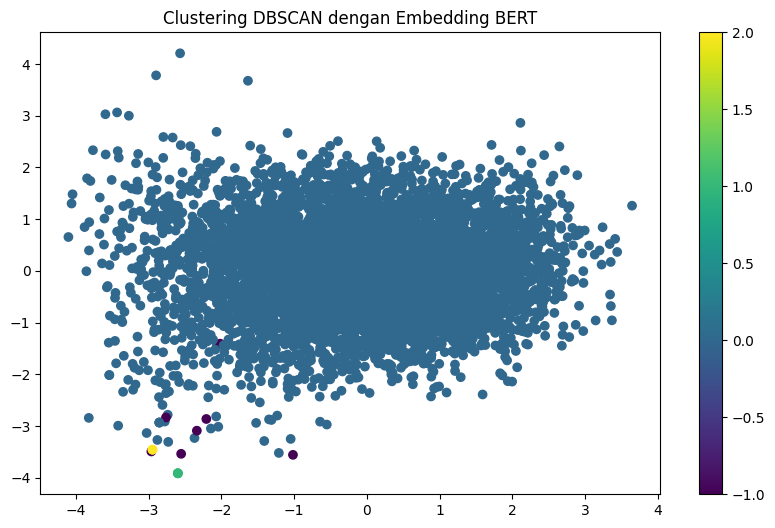

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_array)

# Plot kluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title("Clustering DBSCAN dengan Embedding BERT")
plt.show()

In [ ]:
# prompt: tampilkan noise dari hasil dbscan

noise_points = df_cleaned[df_cleaned['cluster'] == -1]
print("Noise Points (Abstrak dengan Klaster -1):")
print(noise_points[['abstrak', 'cluster']])
print(f"\nJumlah Noise Points: {len(noise_points)}")


Noise Points (Abstrak dengan Klaster -1):
Empty DataFrame
Columns: [abstrak, cluster]
Index: []

Jumlah Noise Points: 0


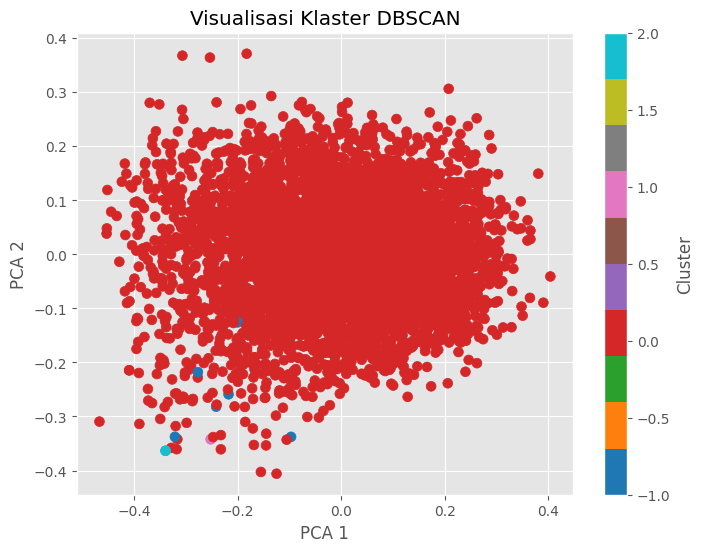

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi BERT embeddings jadi 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

# Visualisasi
plt.figure(figsize=(8,6))
scatter = plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='tab10', s=50)
plt.title("Visualisasi Klaster DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.show()


In [ ]:
from sklearn.manifold import TSNE
reduced = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Gabung teks dan label jadi DataFrame
df_result = pd.DataFrame({'Text': df_cleaned['abstrak'], 'Cluster': labels})

# Filter hanya klaster valid (bukan -1 / noise)
clusters = df_result['Cluster'].unique()


# Inisialisasi TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Loop tiap klaster untuk temukan top words
for cluster in clusters:
    print(f"\n🟦 Topik Cluster {cluster}:\n-------------------")
    cluster_texts = df_result[df_result['Cluster'] == cluster]['Text']

    if len(cluster_texts) < 2:
        print("Jumlah teks terlalu sedikit.")
        continue

    tfidf_matrix = vectorizer.fit_transform(cluster_texts)
    mean_tfidf = tfidf_matrix.mean(axis=0).A1  # ambil rata-rata per kata

    # Ambil top 10 kata dengan TF-IDF tertinggi
    top_indices = np.argsort(mean_tfidf)[::-1][:10]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_indices]

    print("🔑 Kata Kunci:", ", ".join(top_words))


🟦 Topik Cluster 0:
-------------------
🔑 Kata Kunci: tingkat, hasil, teliti, pasien, kerja, model, metode, kembang, studi, kelompok

🟦 Topik Cluster -1:
-------------------
🔑 Kata Kunci: na, informasi, strong, resume, intet, dpm, torres, helene, marie, nota

🟦 Topik Cluster 1:
-------------------
🔑 Kata Kunci: recident

🟦 Topik Cluster 2:
-------------------
🔑 Kata Kunci: ringkas, pdf, file


In [ ]:
# prompt: berdasarkan df_result, cari abstrak yang menampilkan topik cluster -1 dan tampilkan judulnya

# Cari baris di df_result di mana 'Cluster' adalah -1
noise_abstrak_df = df_result[df_result['Cluster'] == -1]

# Gabungkan kembali dengan dataframe asli (df_cleaned) untuk mendapatkan judul
# Asumsi indeks df_result sesuai dengan df_cleaned setelah filtering dan preprocessing
# Jika tidak sesuai, Anda perlu cara lain untuk menggabungkan, misalnya berdasarkan konten abstrak
# Di sini kita asumsikan indeks sama setelah preprocessing awal
noise_docs_with_titles = df_cleaned.loc[noise_abstrak_df.index]

# Tampilkan judul untuk abstrak di cluster -1
print("Judul untuk abstrak yang masuk dalam topik klaster -1 (Noise):")
if not noise_docs_with_titles.empty:
    for index, row in noise_docs_with_titles.iterrows():
        print(f"- {row['judul']}")
else:
    print("Tidak ada abstrak yang masuk dalam topik klaster -1.")


Judul untuk abstrak yang masuk dalam topik klaster -1 (Noise):
- ensefalitis reseptor antinnmethyldaspartat kombinasi teratoma lapor
- c
- delirium pasien covid parah hasil studi longitudinal mapa
- tindak kriminal greenland latar sosiologis
- waris budaya aminata sow fall remy medou mvomo
- vii syriacum kongres studi kristen arab
- terjemah etika retroconversion


In [ ]:
fulltranslate = pd.read_csv('full translate jurnal.csv')

In [ ]:
# prompt: berdasarkan df_result, cari abstrak yang menampilkan topik cluster -1 dan tampilkan judulnya lalu hubungkan ke df full translate ['title']

# Cari baris di df_result di mana 'Cluster' adalah -1
noise_abstrak_df = df_result[df_result['Cluster'] == -1]

# Dapatkan indeks dari noise_abstrak_df
noise_indices = noise_abstrak_df.index

# Ambil baris dari df_cleaned yang memiliki indeks yang sama
# df_cleaned berisi data setelah preprocessing dan sebelum clustering DBSCAN
# Ini harusnya sesuai dengan df_result
noise_docs_with_titles = df_cleaned.loc[noise_indices]

# Sekarang, ambil judul dari df_cleaned untuk abstrak yang masuk klaster -1
noise_titles_from_cleaned = noise_docs_with_titles['judul'].tolist()

# Ambil dataframe df full translate
# Asumsikan df full translate (yang sebelum preprocessing) juga memiliki indeks yang sama
# dengan df_cleaned dan df_result
df_full_translate = pd.read_csv('full translate jurnal.csv')

# Ambil judul dari df_full_translate yang memiliki indeks yang sama dengan noise_abstrak_df
noise_titles_from_full_translate = df_full_translate.loc[noise_indices]['Title'].tolist()


# Tampilkan judul untuk abstrak di cluster -1 dari df_cleaned
print("Judul dari df_cleaned untuk abstrak yang masuk dalam topik klaster -1 (Noise):")
if noise_titles_from_cleaned:
    for title in noise_titles_from_cleaned:
        print(f"- {title}")
else:
    print("Tidak ada abstrak yang masuk dalam topik klaster -1.")

print("\nJudul dari df_full_translate (asli) untuk abstrak yang masuk dalam topik klaster -1 (Noise):")
if noise_titles_from_full_translate:
    for title in noise_titles_from_full_translate:
        print(f"- {title}")
else:
    print("Tidak ada abstrak yang masuk dalam topik klaster -1 di data asli.")


Judul dari df_cleaned untuk abstrak yang masuk dalam topik klaster -1 (Noise):
- ensefalitis reseptor antinnmethyldaspartat kombinasi teratoma lapor
- c
- delirium pasien covid parah hasil studi longitudinal mapa
- tindak kriminal greenland latar sosiologis
- waris budaya aminata sow fall remy medou mvomo
- vii syriacum kongres studi kristen arab
- terjemah etika retroconversion

Judul dari df_full_translate (asli) untuk abstrak yang masuk dalam topik klaster -1 (Noise):
- Ensefalitis reseptor anti-N-N-methyl-D-aspartat dikombinasikan dengan teratoma: dua kasus laporan
- `#br# 14C一尿素呼吸试验检测 胃幽门弯 曲菌#br#
- Delirium pada pasien dengan COVID-19 yang parah: Hasil awal dari studi longitudinal MAPA
- Tindakan Kriminal Greenland dan latar belakang sosiologisnya.
- Warisan Budaya di Aminata Sow Fall dan Remy Medou Mvomo
- VII Syriacum dan Kongres 5 Studi Kristen Arab
- Terjemahan dan Etika: Masalah Retroconversion


In [ ]:
# prompt: berdasarkan df_result, cari abstrak yang menampilkan topik cluster -1, 0,1,2 dan tampilkan judulnya lalu hubungkan ke df full translate ['title'] , sample 5 judul tiap cluster , lalu simpan ke dataset baru

# Buat dataframe baru untuk menyimpan hasil
cluster_sample_titles = []

# Identifikasi cluster yang ingin ditampilkan
clusters_to_sample = [-1, 0, 1, 2]

# Loop melalui setiap cluster yang diinginkan
for cluster_id in clusters_to_sample:
    print(f"\n--- Judul untuk Klaster {cluster_id} ---")

    # Filter df_result untuk mendapatkan baris pada cluster saat ini
    cluster_data = df_result[df_result['Cluster'] == cluster_id]

    if cluster_data.empty:
        print(f"Tidak ada data di klaster {cluster_id}.")
        continue

    # Dapatkan indeks dari data klaster
    cluster_indices = cluster_data.index

    # Ambil judul dari df_full_translate menggunakan indeks yang sama
    # Ini menghubungkan hasil clustering (df_result) dengan data asli (df_full_translate)
    # Asumsi bahwa indeks df_result sesuai dengan df_full_translate setelah filtering dan preprocessing yang relevan
    cluster_titles_full_translate = df_full_translate.loc[cluster_indices, 'Title'].tolist()
    cluster_abstracts_full_translate = df_full_translate.loc[cluster_indices, 'Abstract'].tolist()

    # Tampilkan judul untuk cluster saat ini
    if cluster_titles_full_translate:
        # Ambil sampel 5 judul (atau semua jika kurang dari 5)
        sample_titles = np.random.choice(cluster_titles_full_translate, min(5, len(cluster_titles_full_translate)), replace=False).tolist()
        print(f"Sampel 5 Judul (atau kurang jika datanya sedikit):")
        for i, title in enumerate(sample_titles):
            print(f"{i+1}. {title}")

        # Tambahkan judul dan ID klaster ke list untuk dataframe baru
        for title in cluster_titles_full_translate:
             cluster_sample_titles.append({'Cluster': cluster_id, 'Title': title})

    else:
        print("Tidak ada judul yang ditemukan untuk klaster ini di data asli.")

# Konversi list of dictionaries menjadi DataFrame baru
df_cluster_titles = pd.DataFrame(cluster_sample_titles)

# Tampilkan dataframe baru (beberapa baris pertama)
print("\n--- DataFrame Baru dengan Judul per Klaster ---")
print(df_cluster_titles.head())
print(df_cluster_titles['Cluster'].value_counts().sort_index())

# Simpan dataframe baru ke file CSV
df_cluster_titles.to_csv('judul_per_klaster_sample.csv', index=False)

print("\nDataFrame 'judul_per_klaster_sample.csv' berhasil disimpan.")



--- Judul untuk Klaster -1 ---
Sampel 5 Judul (atau kurang jika datanya sedikit):
1. Ensefalitis reseptor anti-N-N-methyl-D-aspartat dikombinasikan dengan teratoma: dua kasus laporan
2. `#br# 14C一尿素呼吸试验检测 胃幽门弯 曲菌#br#
3. Warisan Budaya di Aminata Sow Fall dan Remy Medou Mvomo
4. VII Syriacum dan Kongres 5 Studi Kristen Arab
5. Terjemahan dan Etika: Masalah Retroconversion

--- Judul untuk Klaster 0 ---
Sampel 5 Judul (atau kurang jika datanya sedikit):
1. Episode The Hunt for Falcons dalam kesunyian kedua Góngora. Tragedi tanpa kesedihan
2. Karya -karya A. N. Radishchev: Studi tentang Interpretasi Ekonomi dan Antropologis
3. Proses semiotisasi inferensial dalam "el sur" de borges dan erice
4. Polineuropati diabetik dan risiko jatuh: takut jatuh dan faktor lainnya
5. Studi retrospektif bias budaya dan refleksi mereka di antara mahasiswa kedokteran Korea: perspektif hibriditas budaya

--- Judul untuk Klaster 1 ---
Sampel 5 Judul (atau kurang jika datanya sedikit):
1. Pastor Stanisław Kow

In [ ]:
# prompt: save code sebelum ini ke dataset baru

filename = "dataset baru.csv"
df2.to_csv(filename, index=False)


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

# 1. Load teks
df = pd.read_csv("/content/dataset baku.csv")

# 2. Bersihkan data: hilangkan NaN dan ubah ke string
df = df.dropna(subset=['abstrak'])  # buang baris yang kolom 'abstrak'-nya kosong
teks = df['abstrak'].astype(str).tolist()  # pastikan semua dalam bentuk string

# 3. Embedding dengan BERT
model = SentenceTransformer('all-MiniLM-L6-v2')
X = model.encode(teks)

# 4. Clustering DBSCAN
db = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
labels = db.fit_predict(X)

# 5. Evaluasi
if len(set(labels)) > 1:
    sil_score = silhouette_score(X, labels, metric='cosine')
    print("Silhouette Score:", sil_score)
else:
    print("Semua data masuk ke satu klaster (atau hanya noise), silhouette tidak dapat dihitung.")

print("Jumlah klaster (termasuk noise):", len(set(labels)))
print("Jumlah noise:", list(labels).count(-1))

Silhouette Score: 0.31457645
Jumlah klaster (termasuk noise): 2
Jumlah noise: 59


Text  Cluster
0     abstrak darat herring atlantik besar spesies l...        0
1     artikel lanjut tema migran sah angkat l siegel...        0
2     artikel hubung ingat sejarah lisan waris wujud...        0
3     makalah desain sistem algoritma kontrol hibrid...        0
4     artikel tinjau konseptual kait konten kompeten...        0
...                                                 ...      ...
6720  urut korup pandang diskriminatif gender kritik...        0
6721  shuangjiang li kun zhou guowei che mei jianhua...        0
6722  minta deban life increach kembang eksetasi par...        0
6723  latar tahap gagal jantung hf acu sakit jantung...        0
6724  ajar pengaruh aplikasi asam salisilat prapanen...        0

[6697 rows x 2 columns]